## ISYE 6402, Module 4 - Forecasting Alaska Moose

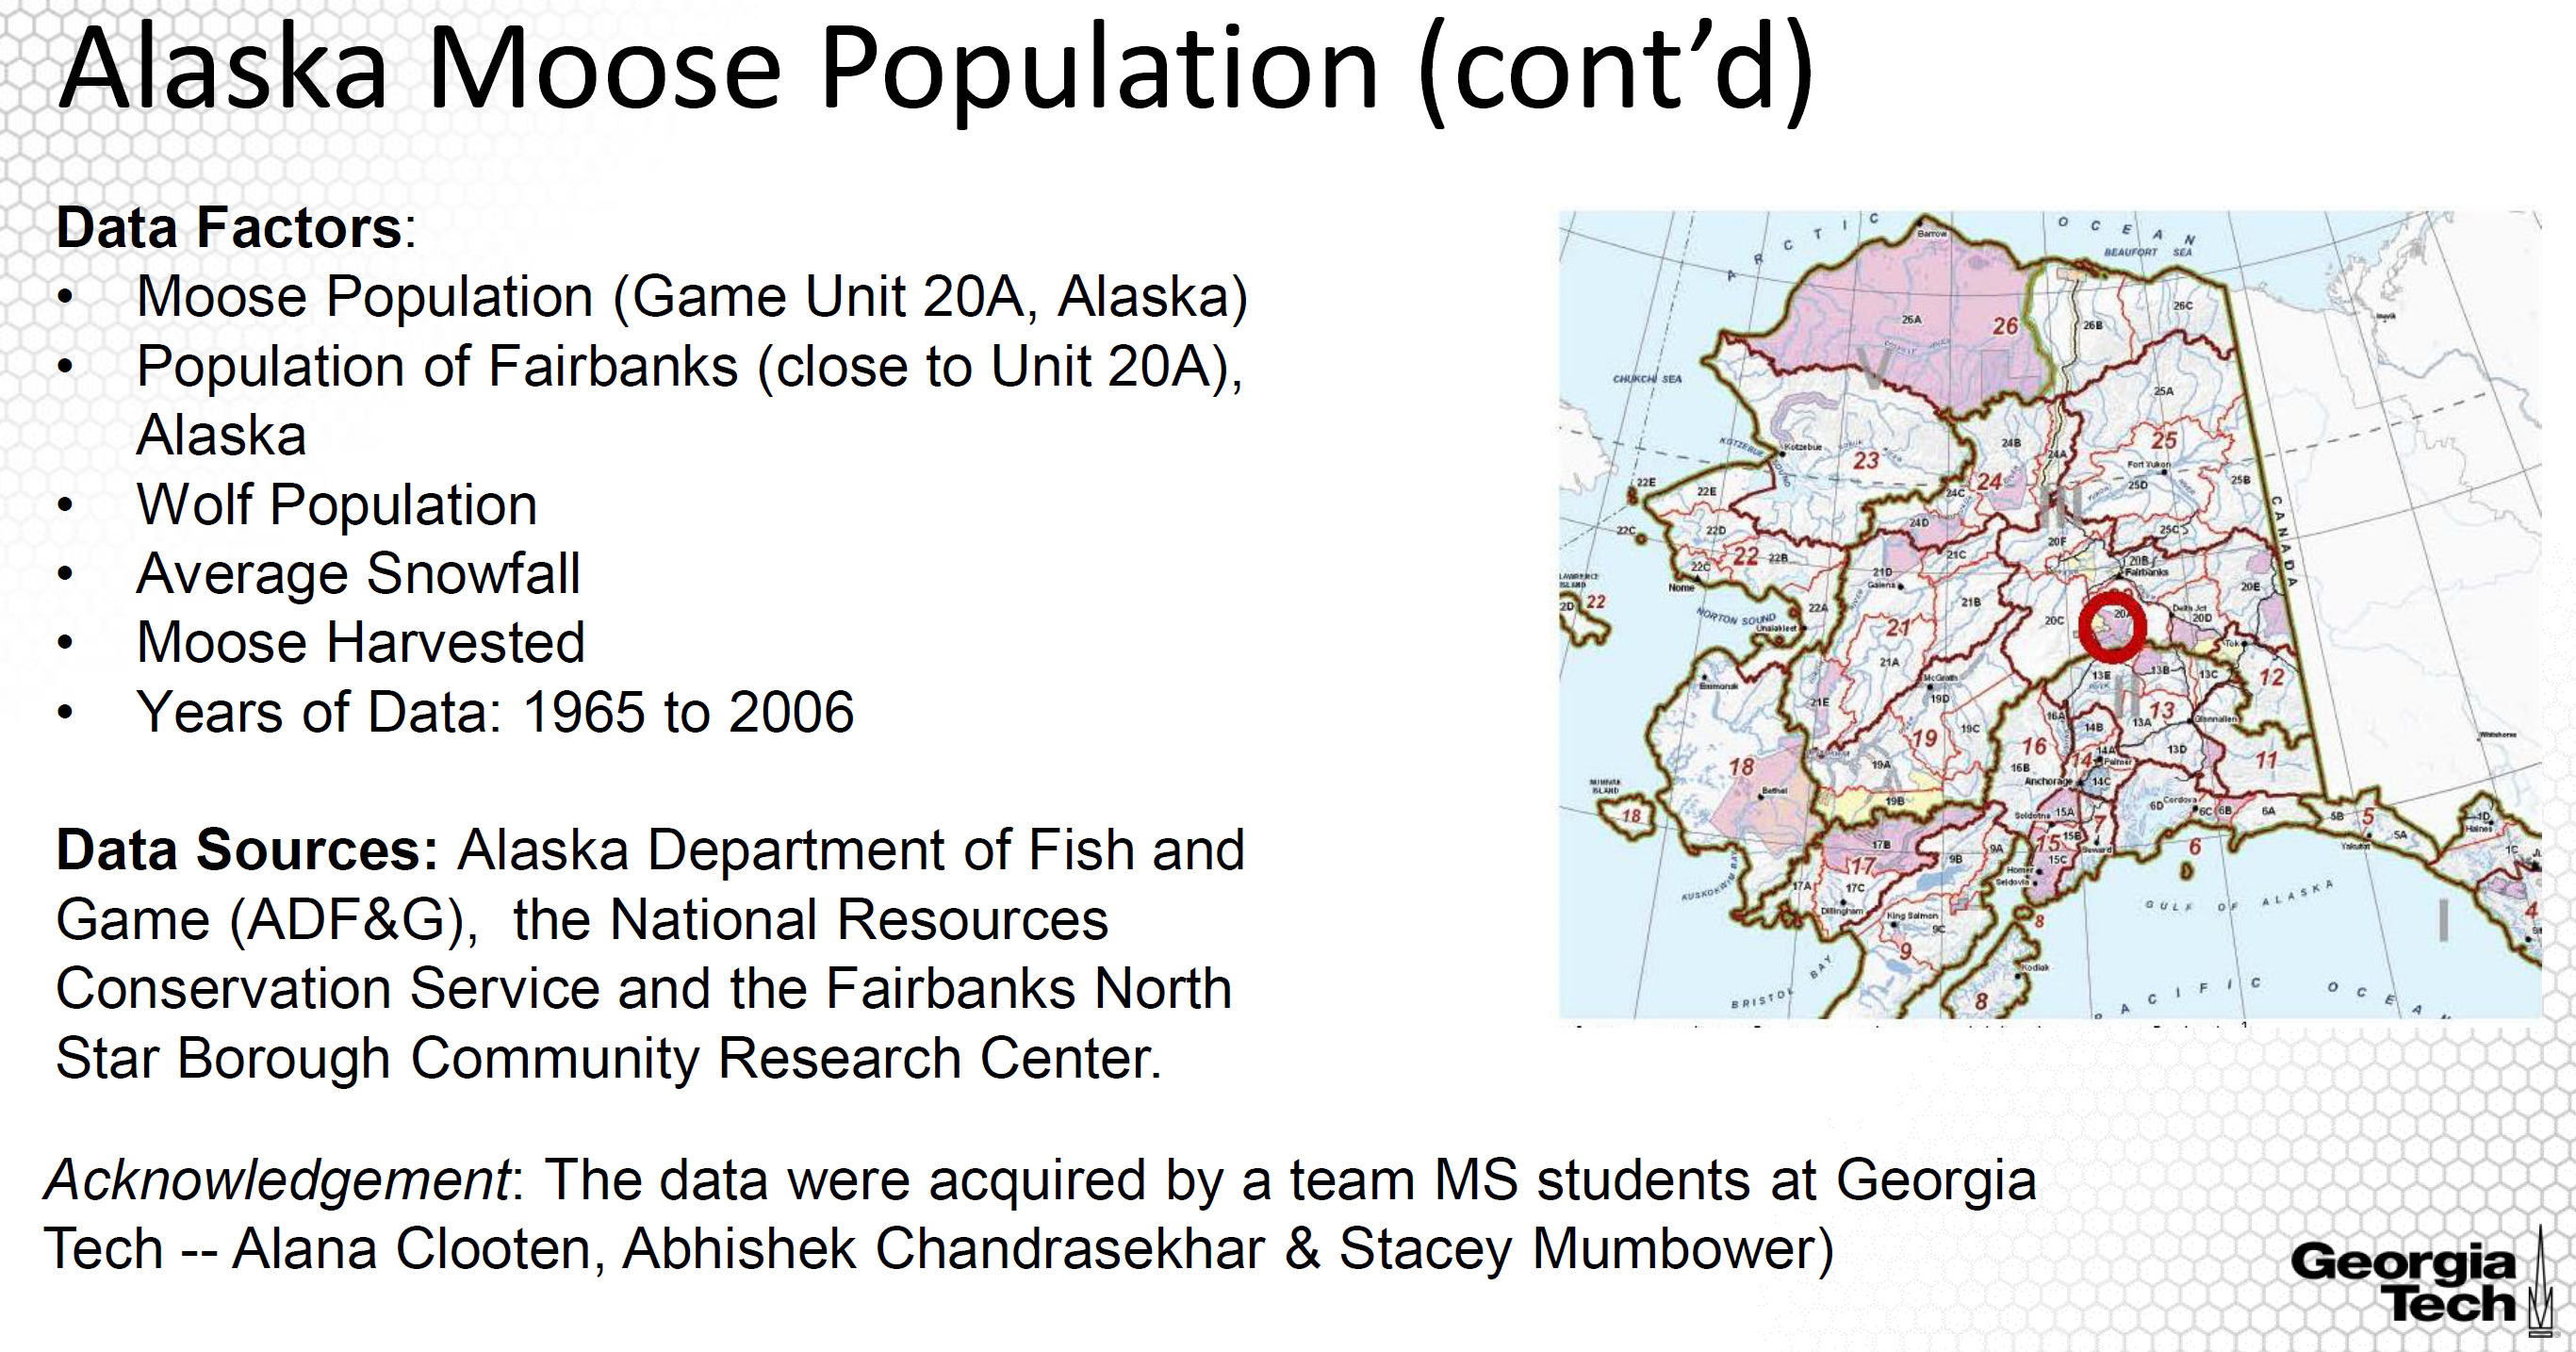



The population of wild moose in areas such as Alaska often fluctuates over several years, due to both human influence and natural factors. While the fluctuations are rarely drastic across a given year, they do exhibit a general rise-and-fall trend over time. The endpoint of this study is to predict the Alaska moose population. 

In this lesson, we'll ignore other factors which may impact the rise or fall of the moose population. We'll simply predict using the total yearly moose population alone. 

In the next lesson, we'll consider other factors and compare the predictions from this lesson. 

Why is it important to predict the Alaska moose population? For many Alaskans, moose meat is the largest source of food income for a family, as a typical moose weighs approximately 1,200 to 1,500 pounds and provides a typical family with 500 to 600 pounds of edible food. Thus, it is of great importance to the Alaskan citizens to manage and control the moose population to ensure the sustainability of this population. Not only harvested for its food source, the moose is harvested for clothing purposes as well. The findings established in such a study can be of particular use to the Alaska Division of Wildlife Conservation, which tracks populations of species across several years for scientific and conservation purposes.

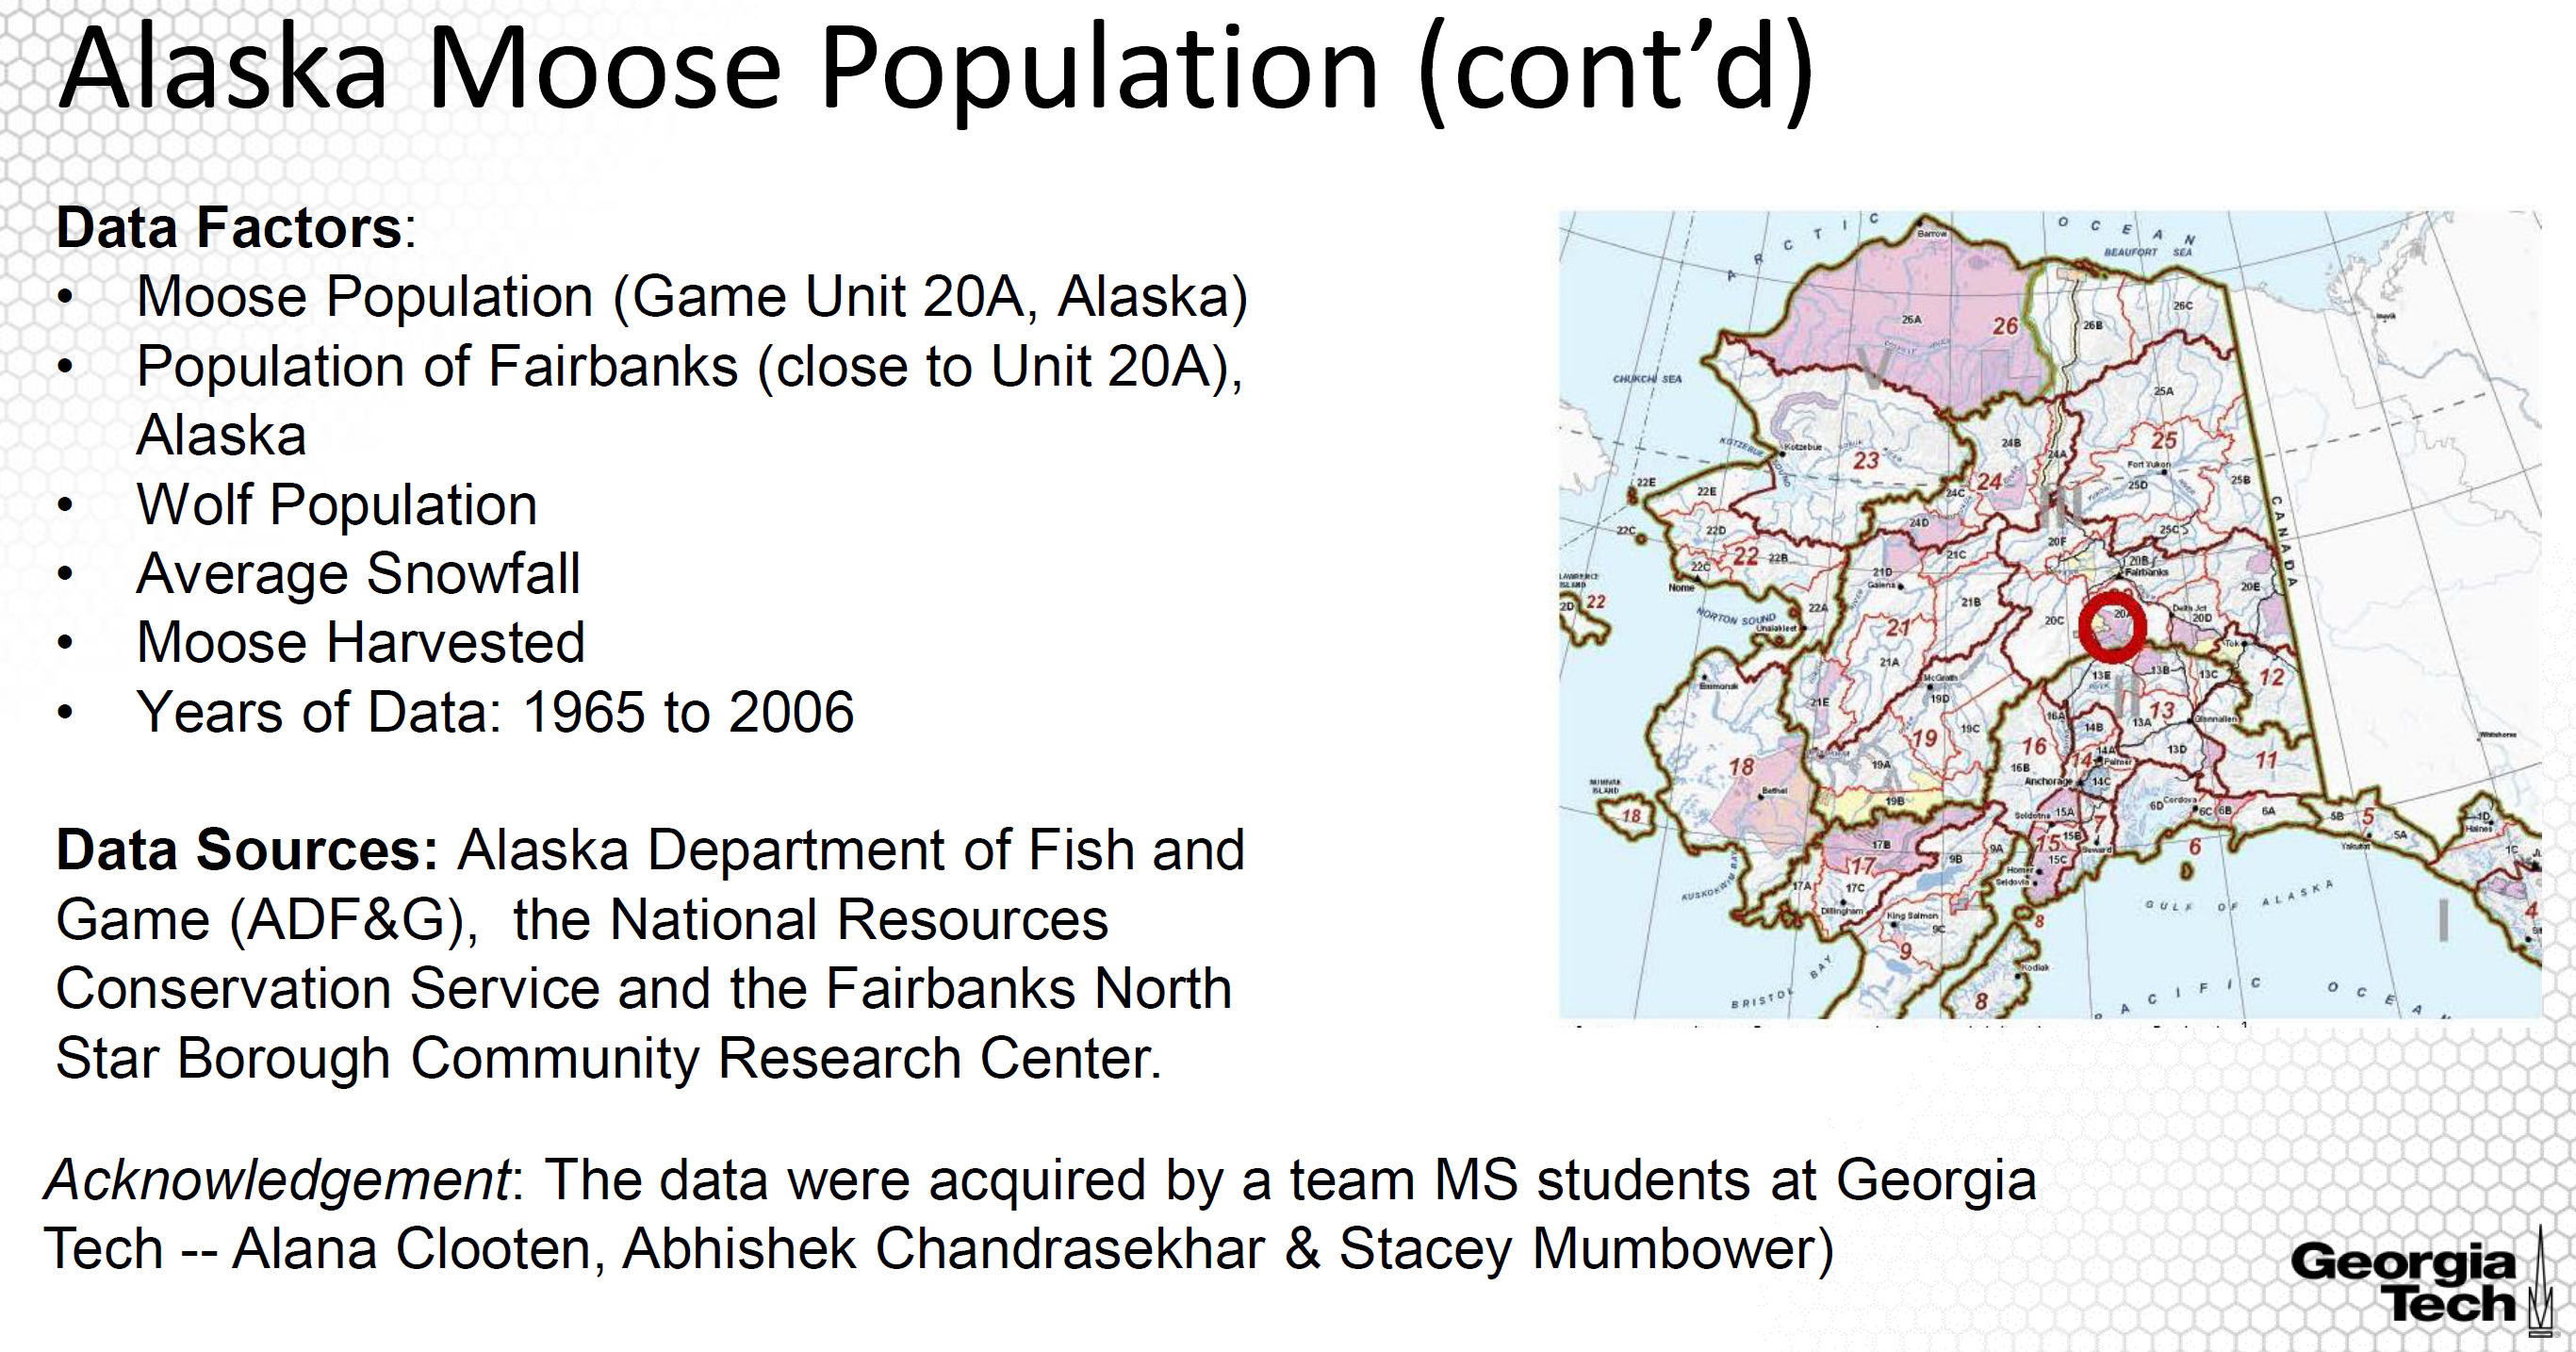



In [1]:
## Libraries
library(TSA, warn.conflicts = FALSE)
library(aod, warn.conflicts = FALSE)
library(urca, warn.conflicts = FALSE)
library(tseries, warn.conflicts = FALSE)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [1]:
data=read.csv("MooseData.csv",header=T)       
names(data) <- c("year", "fairbanksPop", "mooseHarvest", "totalMoose", "avgSnow", "wolfPop") 

years=data[,"year"] 
ts_fairbanksPop=ts(data[,"fairbanksPop"],start=1965, freq=1)
ts_mooseHarvest=ts(data[,"mooseHarvest"],start=1965, freq=1)
ts_totalMoose=ts(data[,"totalMoose"],start=1965, freq=1)
ts_avgSnow=ts(data[,"avgSnow"],start=1965, freq=1)
ts_wolfPop=ts(data[,"wolfPop"],start=1965, freq=1)

**Time Series Plots**

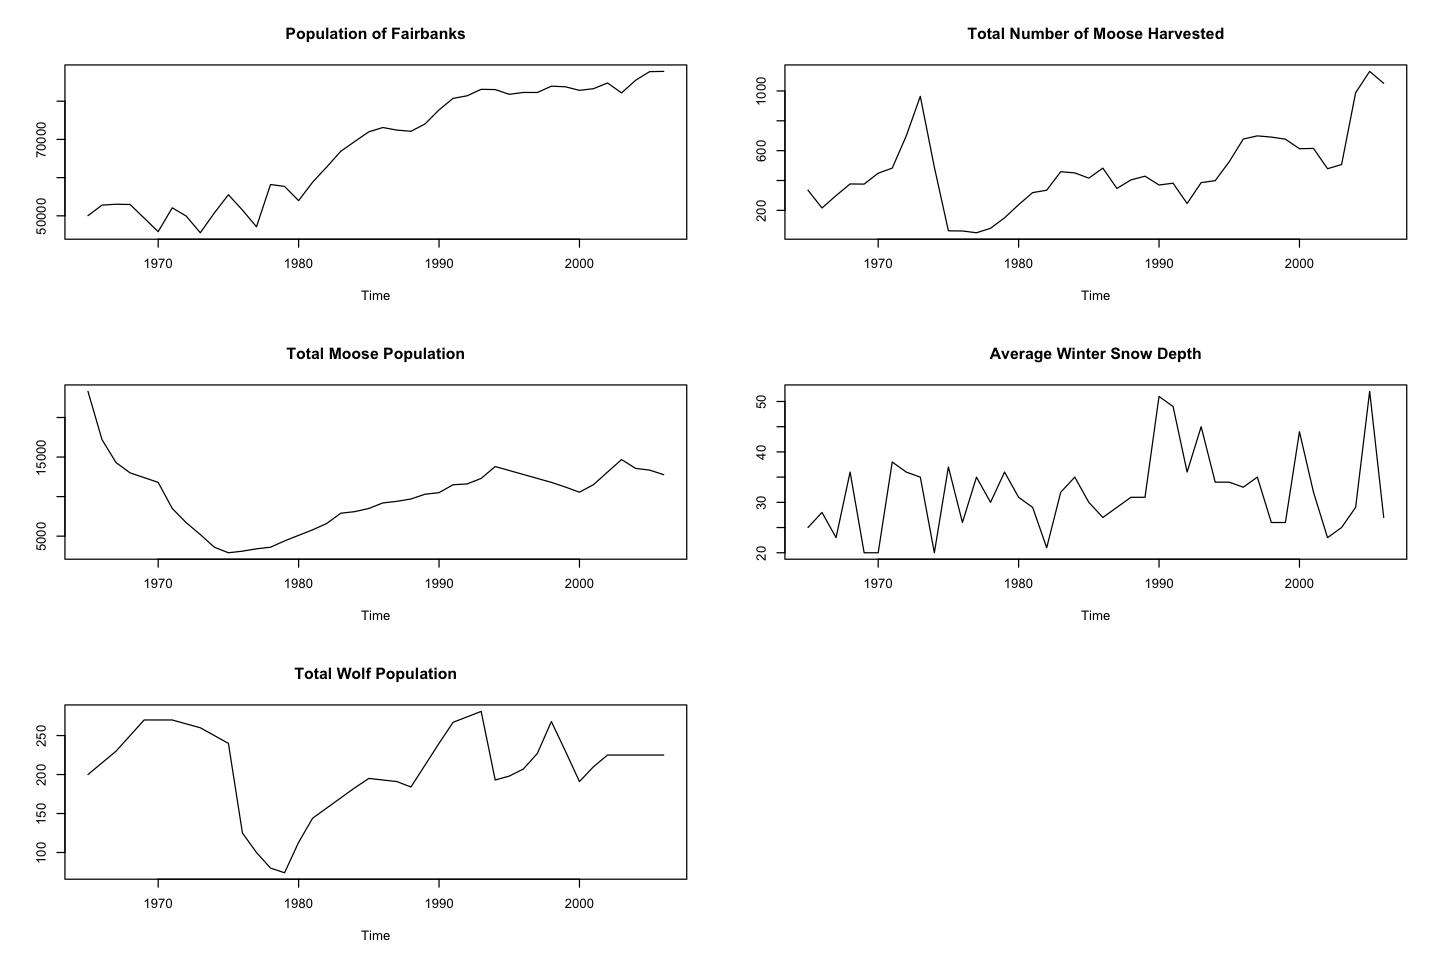

In [2]:
options(repr.plot.width=12, repr.plot.height=8)

#Plots the six time series#
par(mfrow=c(3,2))
plot(ts_fairbanksPop, type="l", main=paste("Population of Fairbanks"),ylab="")
plot(ts_mooseHarvest, type="l", main=paste("Total Number of Moose Harvested"),ylab="")
plot(ts_totalMoose, type="l", main=paste("Total Moose Population"),ylab="")
plot(ts_avgSnow, type="l", main=paste("Average Winter Snow Depth"),ylab="")
plot(ts_wolfPop, type="l", main=paste("Total Wolf Population"),ylab="")

We begin by reading the data file in R and converting the columns into time series. 

- Because the data are observed yearly, the frequency for each time series is equal to 1. 
- We further plot the time series of the Moose population. 
- Similarly, we can plot the time series of all other factors to be considered in predicting the Moose population in the next lesson. 
- Last we also plot its 1st order difference and the acf & pacf plots.

The time series plots of the Moose population and the other factors in the dataset are on the slide.  Again, we'll focus on the total moose population in the study. 

- We can see that many of the factors provided have some overlapping patterns with the time series of the total moose population. 
- The question we will address in this lecture is whether we can forecast the total moose population with the aid of other factors. 
- Does the wolf population impact the moose population? 
- Does the moose population tend to decrease with heavy snow? 

Again, such questions can be addressed with an MVTS analysis.


**Difference Plots**

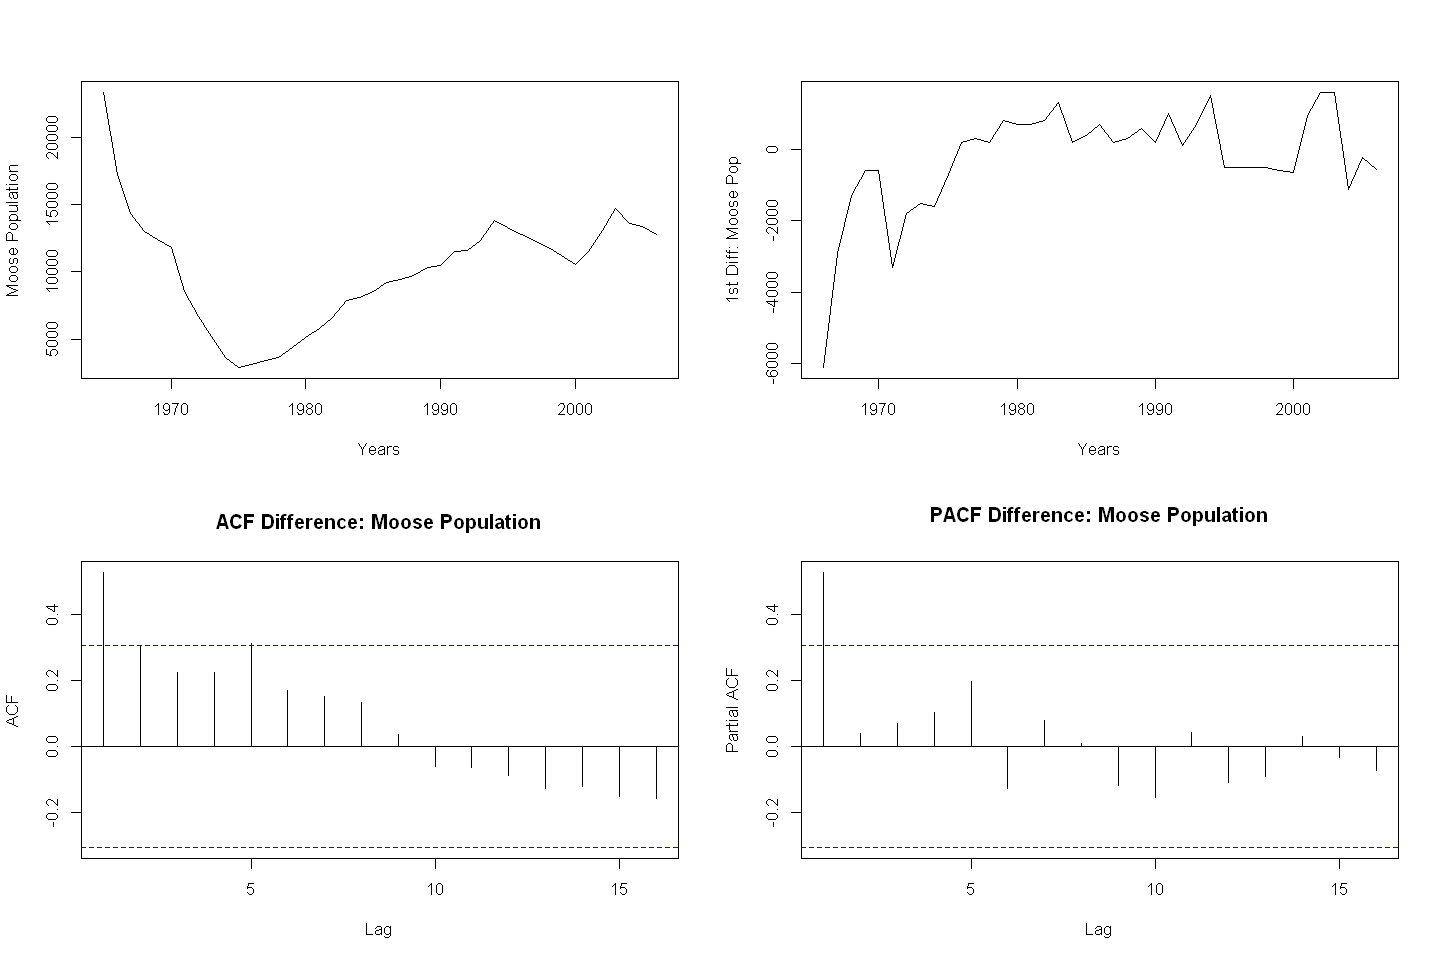

In [4]:
##Total Moose Population: Original & Differenced Time series##
par(mfrow=c(2,2))
plot(ts_totalMoose,xlab="Years",ylab="Moose Population",type="l")
plot(diff(ts_totalMoose),xlab="Years",ylab="1st Diff: Moose Pop",type="l")
acf(diff(ts_totalMoose),main="ACF Difference: Moose Population")
pacf(diff(ts_totalMoose),main="PACF Difference: Moose Population")

- Since trend is predominant in the time series presented in the previous slide, we'll explore the first order difference time series of the Moose population time series. 
- In the upper left plot, you'll find the original time series to compare it to the differenced time series in the upper-right plot. 
- While we see a clear trend in the original time series, 1st order differencing is enough to remove this trend. However, we'll still see some patterns in the differenced time series, indicating that one order difference may not completely remove the trend or other patterns that could lead to nonstationarity of the time series. 
- The ACF and PACF plots do not indicate non-stationarity however. They both have only one lag outside of the confidence band which indicates stationarity.


### Alaska Moose Population: Univariate Analysis

**Removing Trend**

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.



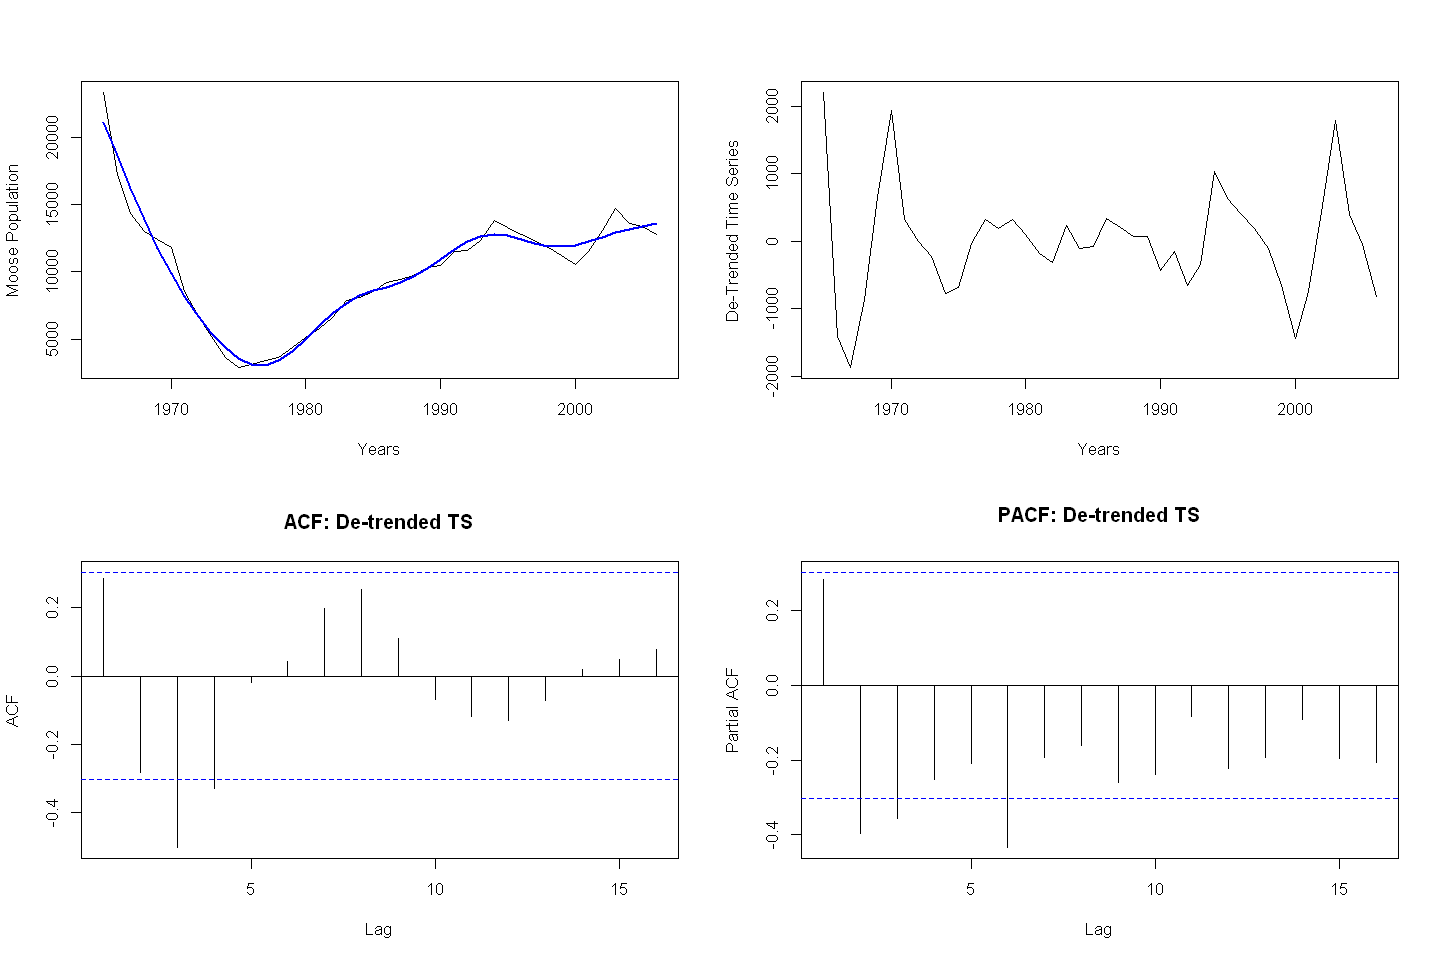

In [5]:
##########################################################################
############# APROACH 1: Trend Estimaiton + ARMA ########################
##########################################################################
## Fit Trend 
library(mgcv, warn.conflicts = FALSE)
totalMoose = data[,"totalMoose"]
time.pts = c(1:length(totalMoose))
time.pts = c(time.pts - min(time.pts))/max(time.pts)

gam.fit.tr = gam(totalMoose~s(time.pts))

moose.fit.gam = fitted(gam.fit.tr)

moose.fit.gam = ts(moose.fit.gam,start=1965, freq=1)

resid.process = totalMoose-moose.fit.gam
resid.process = ts(resid.process,start=1965, freq=1)

par(mfrow=c(2,2))
plot(ts_totalMoose,xlab="Years",ylab="Moose Population",type="l")
lines(moose.fit.gam,lwd=2,col="blue")
plot(resid.process,xlab="Years",ylab="De-Trended Time Series",type="l")
acf(resid.process,main="ACF: De-trended TS")
pacf(resid.process,main="PACF: De-trended TS")

- We'll continue with the first approach by removing the trend and then applying ARMA to the detrended time series. 
- To remove the trend, we'll use a splines regression approach introduced in the first module of this course. 
- I first define the time points, which are simply equally spaced values between zero and one. 
- Then I apply the R command gam, for splines regression, where the gam() is from the library mgcv. 
- Note that in order to specify a non-parametric trend, we need to transform the time points' vector using the s option in gam. - I then extract the residuals of the model, and transform the vector of the residual values into a time series with the same time specifications as the original time series. 
- We can evaluate stationarity of the residuals using the acf and pacf plots.

On the slide are the corresponding plots. 

- In the first plot, we have the observed time series versus the fitted trend. We can see that the black line, which is the observed time series, is very similar to the blue line, which is the fitted line. 
- The upper right plot represents the detrended time series. The detrended time series shows that the trend has been removed.
- The ACF and PACF plots show also that it is plausible that the detrended time series is stationary.


**ARMA Modeling: Detrended Process**

- Next, we apply the **ARMA modeling to the detrended time series called here the residual process.**
- We'll first select the AR and MA order using the AIC approach. 
- We thus fit the model for orders zero through five for both the AR and MA orders.
- And then select the order for AR and MA polynomials such that we have a minimum AIC value.

[1] 2

[1] 3

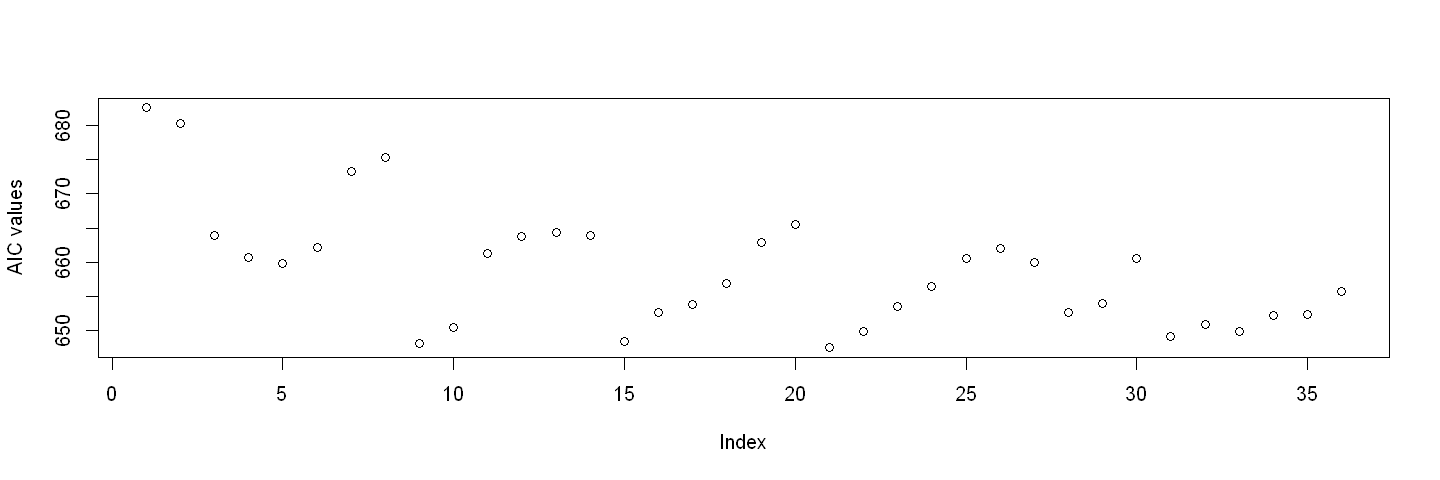

In [6]:
options(warn=-1)
options(repr.plot.width=12, repr.plot.height=4)

## Order selection -- AIC 
n = length(resid.process)
norder = 6
p = c(1:norder)-1; q = c(1:norder)-1
aic = matrix(0,norder,norder)
for(i in 1:norder){
  for(j in 1:norder){
    modij = arima(resid.process,order = c(p[i],0,q[j]), method='ML')
    aic[i,j] = modij$aic-2*(p[i]+q[j]+1)+2*(p[i]+q[j]+1)*n/(n-p[i]-q[j]-2)
  }  
}
aicv = as.vector(aic)  
plot(aicv,ylab="AIC values")
indexp = rep(c(1:norder),norder)
indexq = rep(c(1:norder),each=norder)
indexaic = which(aicv == min(aicv))
porder = indexp[indexaic]-1
qorder = indexq[indexaic]-1

porder
qorder

The selected orders here are two for the AR polynomial and 3 for the MA polynomial.

In [7]:
## Fit ARMA Model
final_model.1 = arima(resid.process,order = c(porder,0,qorder), method='ML')
resids.1 = resid(final_model.1)

**Residual Analysis**

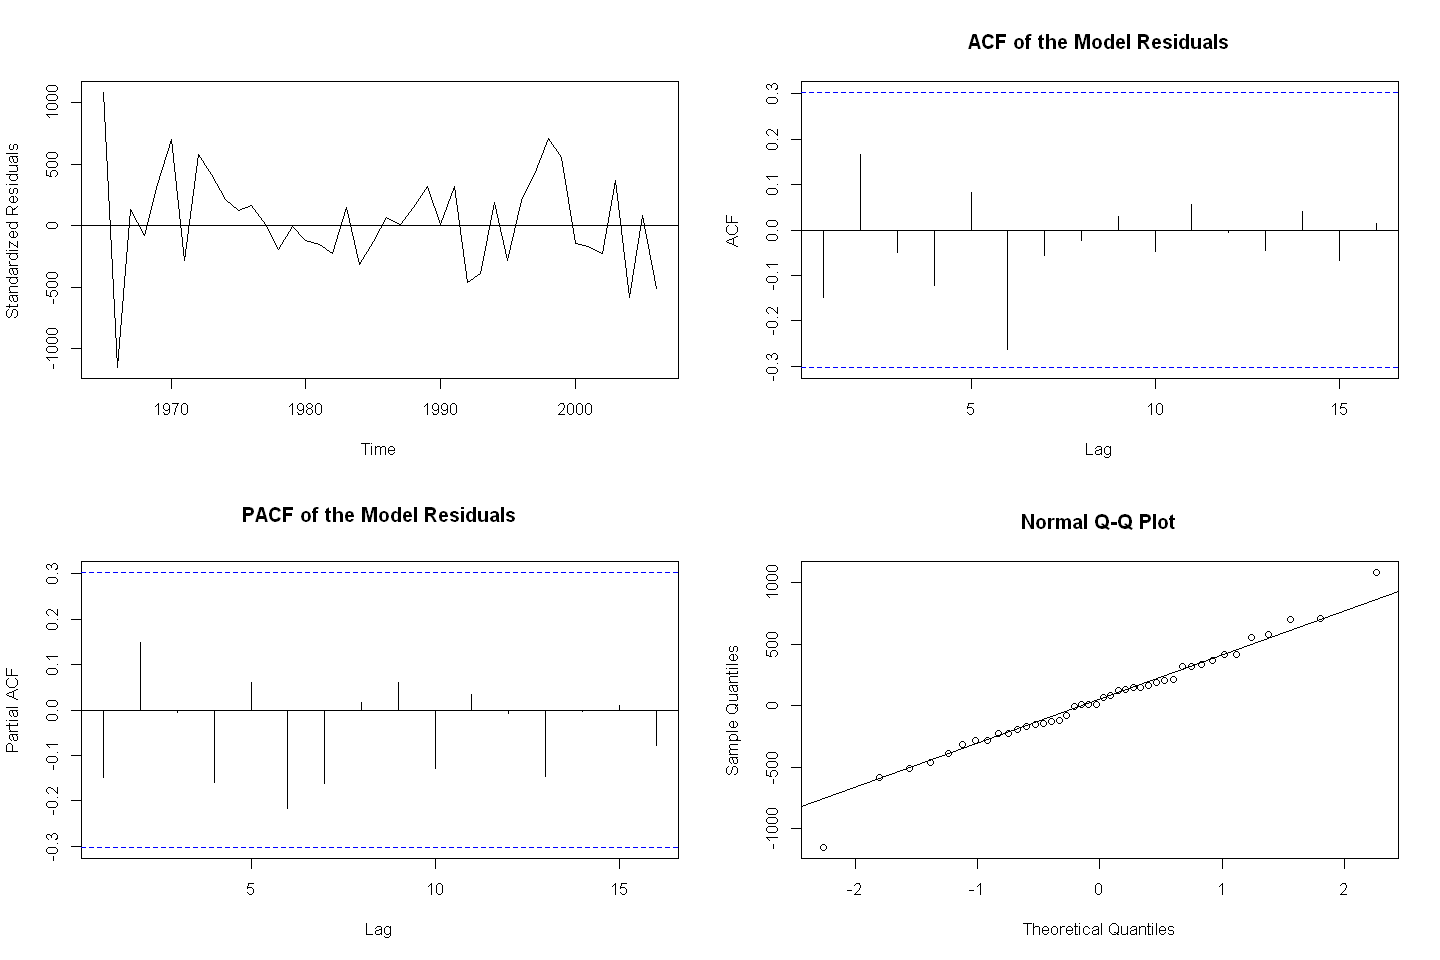

In [8]:
options(repr.plot.width=12, repr.plot.height=8)

par (mfrow=c(2,2))
plot(resids.1, ylab='Standardized Residuals')
abline(h=0)
acf(resids.1,main= 'ACF of the Model Residuals')
pacf(resids.1,main='PACF of the Model Residuals')
qqnorm(resids.1)
qqline(resids.1)

**Forecasting: Trend + ARMA**


- We predict the trend using the predict command. To apply the predict command we need to first define the new data for which we seek to predict future values, those being the four years ahead. 
- Note that when defining the new data, we need to define it as a data frame and we need to specify that the new data are for the same predictors using the fitted model, here being defined as x.

**We then assemble the prediction of the trend with the prediction of the ARMA applied to the residual process then we sum those up to get a final prediction.**

In [9]:
##### Forecasting Trend+ARMA: 4 years ahead ######
n = length(resid.process)
nfit = n-4

## Step 1: Predict trend
train.totalMoose= totalMoose[1:nfit]
x = time.pts[1:nfit]
gam.fit.tr.4 = gam(train.totalMoose~s(x))
newdata = data.frame(x=time.pts[(nfit+1):n])

gam.pred= predict(gam.fit.tr.4,newdata = newdata,interval=c("prediction"))

## Step 2: Predict ARMA
resid.process.4 = totalMoose[1:nfit]-fitted(gam.fit.tr.4)
resid.process = ts(resid.process.4,start=1965, freq=1)
#resid.process.4 = ts(resid.process.4,start=1965, freq=1)

outresid = arima(resid.process.4, order = c(porder,0,qorder),method = "ML")

outpredresid = predict(outresid,n.ahead=4)$pred

## Add up the predictions
final.pred.1 = outpredresid+gam.pred

**ARIMA Modeling**

- We'll next apply ARIMA modeling, which takes into account both the non-stationarity due to the trend and the serial correlation jointly into one model. 
- We'll specify only one order difference to account for the trend and then select the orders of the AR and MA components of the ARMA, using a similar approach as before. 

The final model is one where the ARMA polynomial order is equal to 1 and the MA polynomial order is 0 and a difference of order equal to 1.

[1] 1

[1] 0

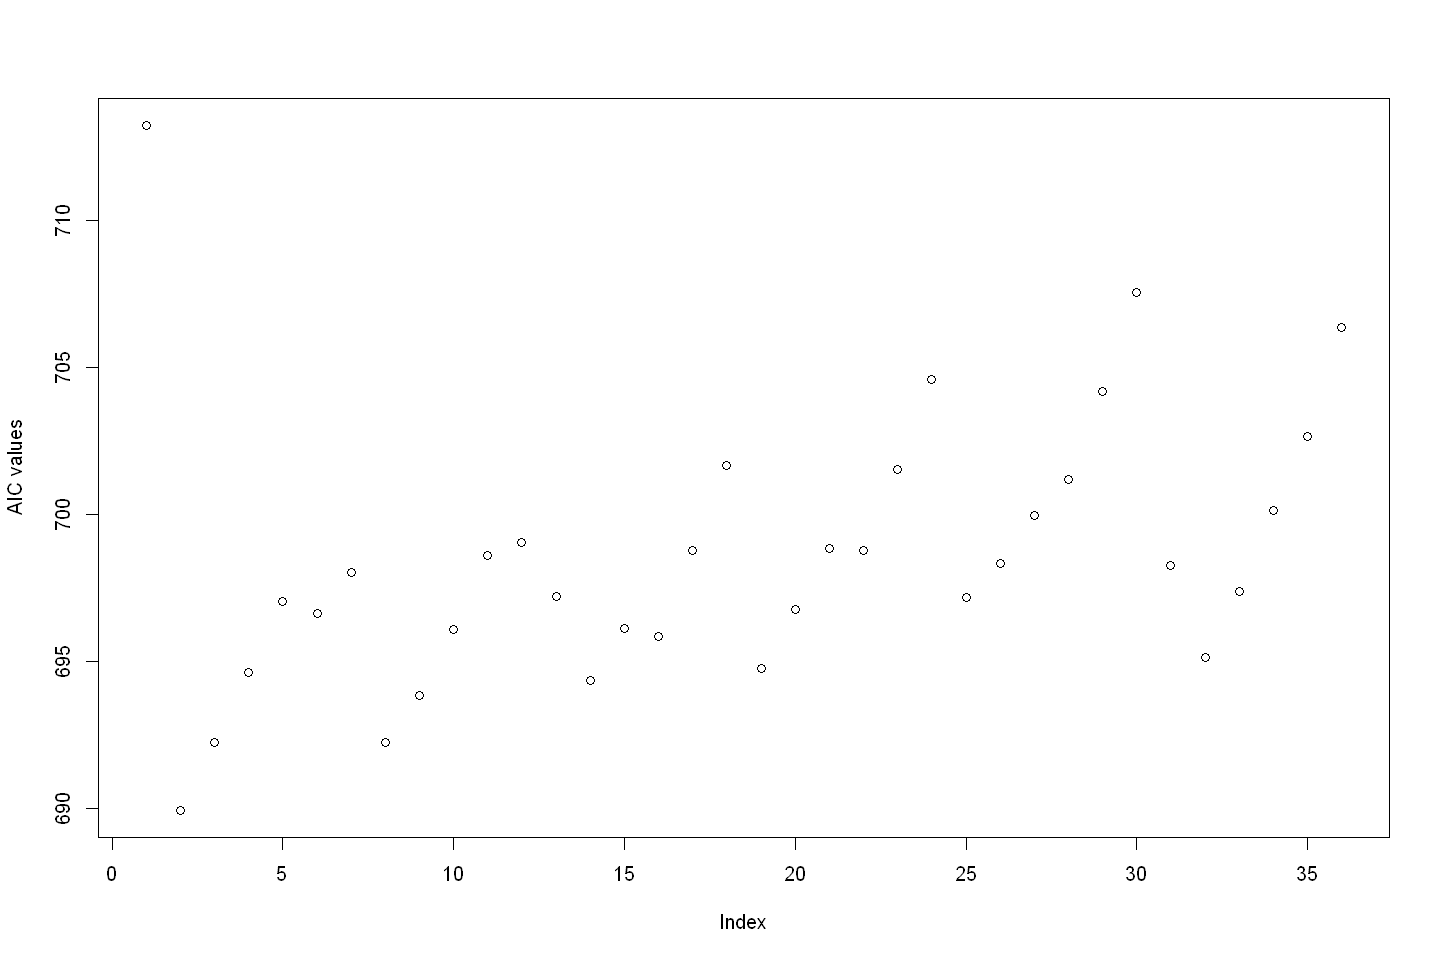

In [10]:
##########################################################################
############# APROACH 2: ARIMA ###########################################
##########################################################################

## Order selection -- AIC 
norder = 6
p = c(1:norder)-1; q = c(1:norder)-1
aic = matrix(0,norder,norder)
for(i in 1:norder){
  for(j in 1:norder){
    modij = arima(ts_totalMoose,order = c(p[i],1,q[j]), method='ML')
    aic[i,j] = modij$aic-2*(p[i]+q[j]+1)+2*(p[i]+q[j]+1)*n/(n-p[i]-q[j]-2)
  }  
}

aicv = as.vector(aic)  
plot(aicv,ylab="AIC values")
indexp = rep(c(1:norder),norder)
indexq = rep(c(1:norder),each=norder)
indexaic = which(aicv == min(aicv))
porder = indexp[indexaic]-1
qorder = indexq[indexaic]-1

porder
qorder

In [11]:
final_model.2 = arima(ts_totalMoose, order = c(porder,1,qorder), method = "ML")
resids.2 = resid(final_model.2)

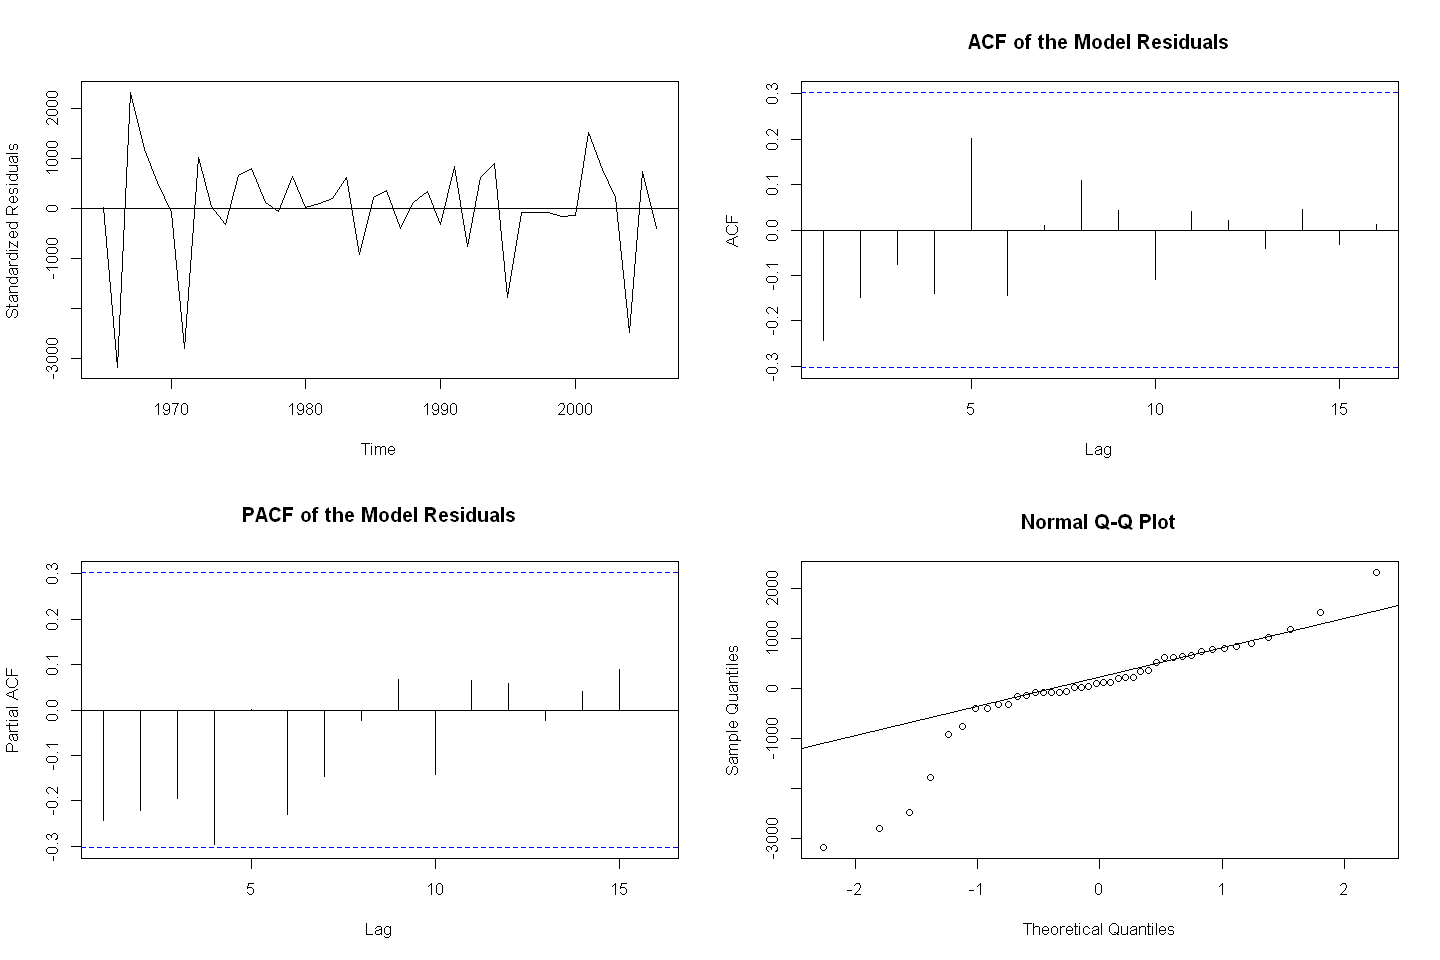

In [12]:
## Residual Analysis
par (mfrow=c(2,2))
plot(resids.2, ylab='Standardized Residuals')
abline(h=0)
acf(resids.2,main= 'ACF of the Model Residuals')
pacf(resids.2,main='PACF of the Model Residuals')
qqnorm(resids.2)
qqline(resids.2)

**Forecasting: ARIMA**

- We continue with forecasting the total moose population using the ARIMA modeling and compare it to the predictions based on the previous approach where we first fitted the trend and applied an ARMA model on the detrended time series. 
- We first refit the ARIMA model based on the data from 1965 to 2002 thus discarding the last four years. Then we use the predict command to predict the four years 2003 to 2006 all at once.

In [13]:
## Forecasting with ARIMA 4 Years Ahead: 
outtotal = arima(ts_totalMoose[1:nfit], order = c(porder,1,qorder),method = "ML")
final.pred.2 = predict(outtotal,n.ahead=4)$pred

We'll next compare the predictions based on the first approach, using trend estimation and ARMA, to the second approach using ARIMA model. We plot a time series of the observed moose population for the four years of the data, overlaying the predictions from the two approaches.

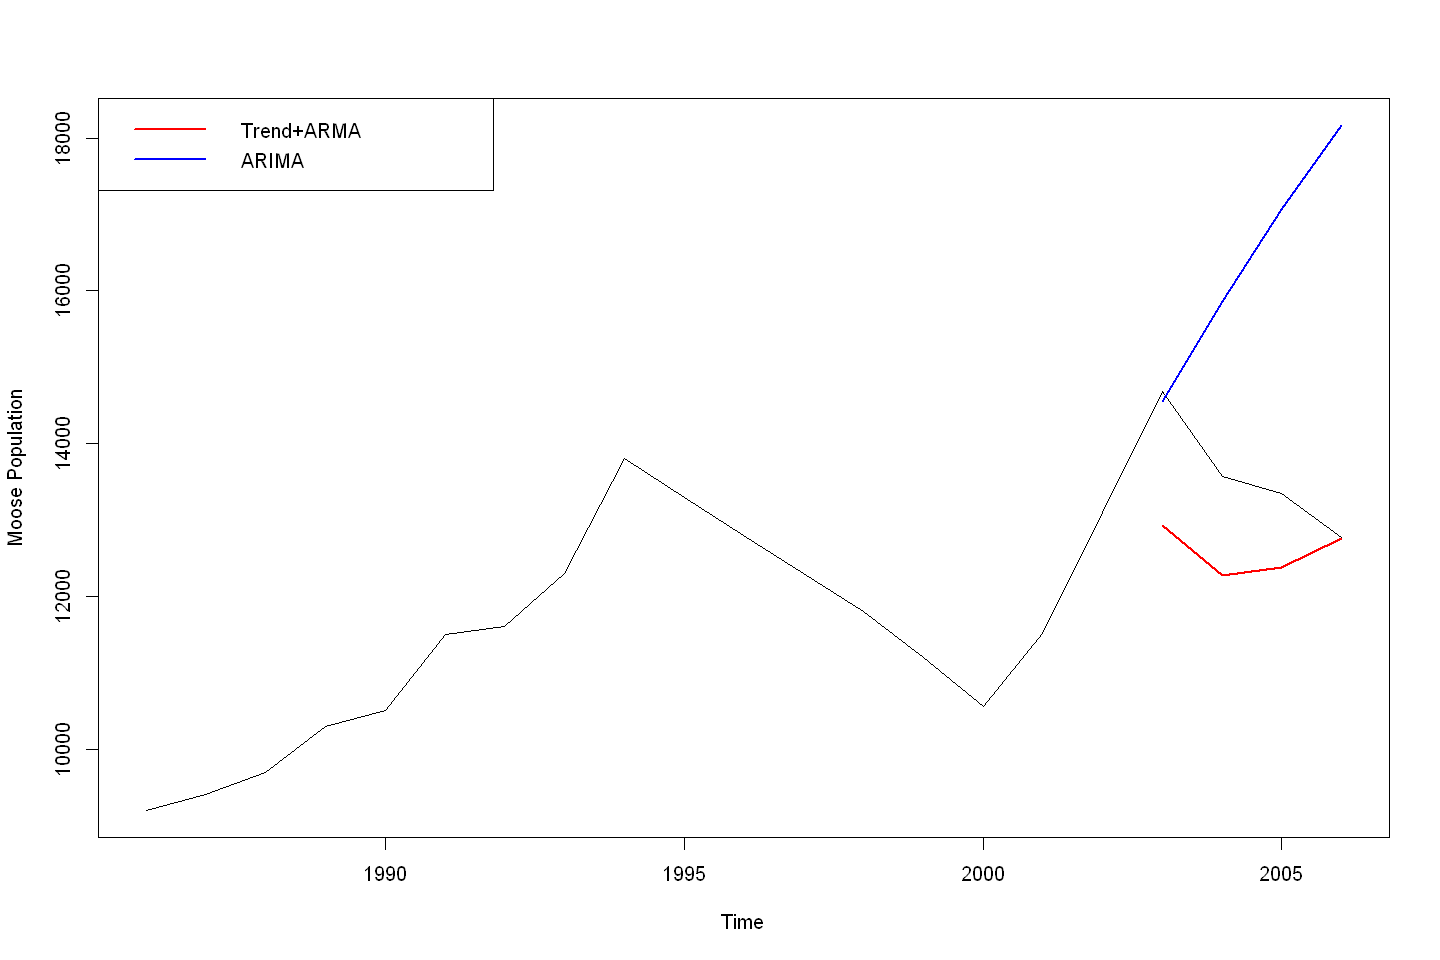

In [14]:
############### Compare Forecasting ############################
par(mfrow=c(1,1))
ymin = min(c(ts_totalMoose[(n-20):n],final.pred.1,final.pred.2))
ymax = max(c(ts_totalMoose[(n-20):n],final.pred.1,final.pred.2))
plot(years[(n-20):n], ts_totalMoose[(n-20):n],type="l", ylim=c(ymin,ymax), xlab="Time", ylab="Moose Population")
lines(years[(nfit+1):n],final.pred.1,col="red",lwd=2)
lines(years[(nfit+1):n],final.pred.2,col="blue",lwd=2)
legend(x = "topleft",legend=c("Trend+ARMA","ARIMA"),col=c("red","blue"),lty=1,lwd = 2)

The comparative plot is on the slide. 
- The black line shows the observed time series for years, 1987 to 2006. 
- The red line is the prediction of the last four years using the first approach and 
- the blue line is for the second approach. 

While neither prediction captures a decreasing trend in the last four years, the first approach is much closer to the observed time series than the second approach. 

In fact, ARIMA simply assumes an increasing trend capturing the trend from 2000 to 2003. This is because the ARMA part of ARIMA adds little to the prediction since it is an **ARMA model of order one** while the prediction, is primary driven by the value of the **last observation of the time series.**

### Alaska Moose Population: Multivariate Analysis

the analysis of the case study on forecasting Moose population in Alaska by fitting a VAR model and comparing it to ARMA modeling forecasts.

**Forecasting Moose Population**

In the previous lesson, we practiced with deriving forecasts of the moose population based on two methods for modeling univariate time series, the ARIMA model and the model in which we first estimate the trend using nonparametric regression then apply ARMA to the de-trended time series. The forecasts are provided in the plot on the slide along with the observed data for comparison. The model in which we account for non-linear trend shown in blue performs better than ARIMA shown in red. 

As pointed out before it is possible for other factors to impact the moose population. For example, the population of moose predators (wolves, for instance) can be a key indicator of the subsequent years' moose populations. Additionally, natural factors such as weather and environmental conditions may play an influential role. Average snow depth for a given year will be used as a measure of how harsh a particular winter season is. The population of the city of Fairbanks (the largest city in the region), as well as the number of moose harvested by hunters each year can reveal the effect of humans on the population of surrounding moose. Can we improve on the forecasting of Alaska moose population by accounting for such factors? Does the wolf population impact the moose population? Does the moose population tend to decrease with heavy snow? Again, such questions can be addressed with a multivariate time series analysis.

**Stationarity through Differencing**

Because the end point of this analysis is to predict the total moose population, we will divide the data into training and testing, where the training data is used for fitting the model and the testing data is used for evaluating the forecasting performance of the fitted models. Next, we will only analyze the training data. 

In the previous lesson, we’ve learned that the data in this study are not stationary, thus we will next assess whether differencing the time series will improve stationarity. Here we apply the 1st order difference.

Here are the time series plots for the 1st order difference. The 1st order difference time series for total moose population still has a trend although this may be random rather systematic trend. For other time series, the 1st order is sufficient to make the difference time series approximately stationary. We will continue with the analysis of the 1st order difference time series.

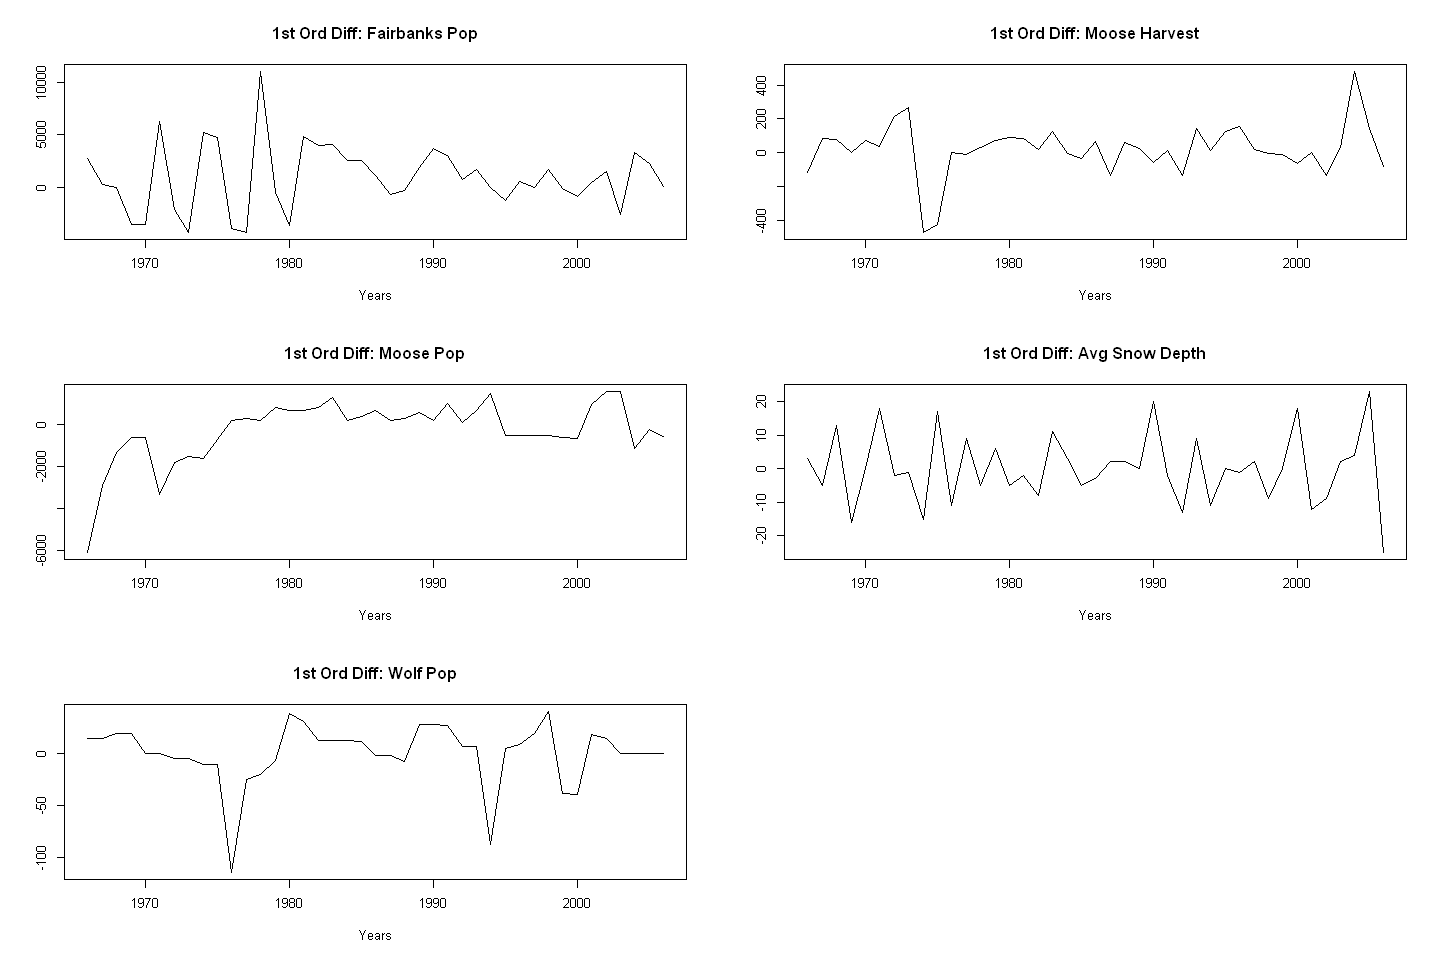

In [15]:
##1st Order Time Series##
par(mfrow=c(3,2))
plot(diff(ts_fairbanksPop),xlab="Years",ylab="",main="1st Ord Diff: Fairbanks Pop",type="l")
plot(diff(ts_mooseHarvest),xlab="Years",ylab="",main="1st Ord Diff: Moose Harvest",type="l")
plot(diff(ts_totalMoose),xlab="Years",ylab="",main="1st Ord Diff: Moose Pop",type="l")
plot(diff(ts_avgSnow),xlab="Years",ylab="",main="1st Ord Diff: Avg Snow Depth",type="l")
plot(diff(ts_wolfPop),xlab="Years",ylab="",main="1st Ord Diff: Wolf Pop",type="l")

**VAR Modeling**

In [16]:
##########################################################################
############# APROACH 3: VAR ###########################################
##########################################################################
n = nrow(data)
data.train=data[1:(n-4),]
data.test=data[(n-3):n,]

ts_fairbanksPop=ts(data.train[,"fairbanksPop"],start=1965, freq=1)
ts_mooseHarvest=ts(data.train[,"mooseHarvest"],start=1965, freq=1)
ts_totalMoose=ts(data.train[,"totalMoose"],start=1965, freq=1)
ts_avgSnow=ts(data.train[,"avgSnow"],start=1965, freq=1)
ts_wolfPop=ts(data.train[,"wolfPop"],start=1965, freq=1)

dts_fairbanksPop= diff(ts_fairbanksPop)
dts_mooseHarvest= diff(ts_mooseHarvest)
dts_totalMoose= diff(ts_totalMoose)
dts_avgSnow= diff(ts_avgSnow)
dts_wolfPop= diff(ts_wolfPop)

- We will continue with applying the VAR modeling to the first order difference data. 
- We first select the AR order using the VARselect() R command using as input the MVTS and the maximum order allowed, here it is 20. 
- The selected order for this particular data is 4. 
- In order to fit a general VAR model with no trend, we can use the VAR() command specifying the selected order. 
- Because we didn’t specify any option for the type, the default is to fit only a constant for the mean with no trend.
- Furthermore, if we would like to fit a restricted model obtained via model selection, we can use restrict() command. 

In the next slides, I present the model output from both models.

In [17]:
####################################################################################
library(vars, warn.conflicts = FALSE)
###VAR Model##
ddata.train=cbind(dts_fairbanksPop,dts_mooseHarvest,dts_totalMoose, dts_avgSnow,dts_wolfPop)
##Model Selection
VARselect(ddata.train, lag.max = 20)$selection

Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: lmtest



AIC(n)  HQ(n)  SC(n) FPE(n) 
     4      4      4      4

In [18]:
## Model Fitting: Unrestricted VAR
model.var=VAR(ddata.train, p=4)
summary(model.var)


VAR Estimation Results:
Endogenous variables: dts_fairbanksPop, dts_mooseHarvest, dts_totalMoose, dts_avgSnow, dts_wolfPop 
Deterministic variables: const 
Sample size: 33 
Log Likelihood: -948.698 
Roots of the characteristic polynomial:
0.9177 0.9177 0.9135 0.9135 0.8969 0.8969 0.8698 0.8698 0.8096 0.8096 0.8001 0.8001 0.7872 0.7872 0.7287 0.7287 0.6111 0.5974 0.5974 0.3662
Call:
VAR(y = ddata.train, p = 4)


Estimation results for equation dts_fairbanksPop: 
dts_fairbanksPop = dts_fairbanksPop.l1 + dts_mooseHarvest.l1 + dts_totalMoose.l1 + dts_avgSnow.l1 + dts_wolfPop.l1 + dts_fairbanksPop.l2 + dts_mooseHarvest.l2 + dts_totalMoose.l2 + dts_avgSnow.l2 + dts_wolfPop.l2 + dts_fairbanksPop.l3 + dts_mooseHarvest.l3 + dts_totalMoose.l3 + dts_avgSnow.l3 + dts_wolfPop.l3 + dts_fairbanksPop.l4 + dts_mooseHarvest.l4 + dts_totalMoose.l4 + dts_avgSnow.l4 + dts_wolfPop.l4 + const 

                      Estimate Std. Error t value Pr(>|t|)  
dts_fairbanksPop.l1    0.15897    0.27730   0.573   0

In [19]:
## Model Fitting: Restricted VAR
model.var.restrict=restrict(model.var)  
summary(model.var.restrict)


VAR Estimation Results:
Endogenous variables: dts_fairbanksPop, dts_mooseHarvest, dts_totalMoose, dts_avgSnow, dts_wolfPop 
Deterministic variables: const 
Sample size: 33 
Log Likelihood: -1020.759 
Roots of the characteristic polynomial:
0.7838 0.7838 0.7838 0.7838 0.7795 0.7795 0.7372 0.7372 0.7372 0.7372 0.6707 0.5935 0.5935 3.946e-08 3.946e-08     0     0     0     0     0
Call:
VAR(y = ddata.train, p = 4)


Estimation results for equation dts_fairbanksPop: 
dts_fairbanksPop = dts_totalMoose.l1 + dts_fairbanksPop.l2 + dts_avgSnow.l3 + const 

                     Estimate Std. Error t value Pr(>|t|)    
dts_totalMoose.l1      1.1185     0.4198   2.665 0.012459 *  
dts_fairbanksPop.l2   -0.6076     0.1200  -5.062 2.13e-05 ***
dts_avgSnow.l3       166.5828    43.5778   3.823 0.000646 ***
const               1680.5147   408.6307   4.113 0.000294 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 2252 on 29 degrees of freedom
Multiple R-

**VAR Modeling: Total Moose Population**

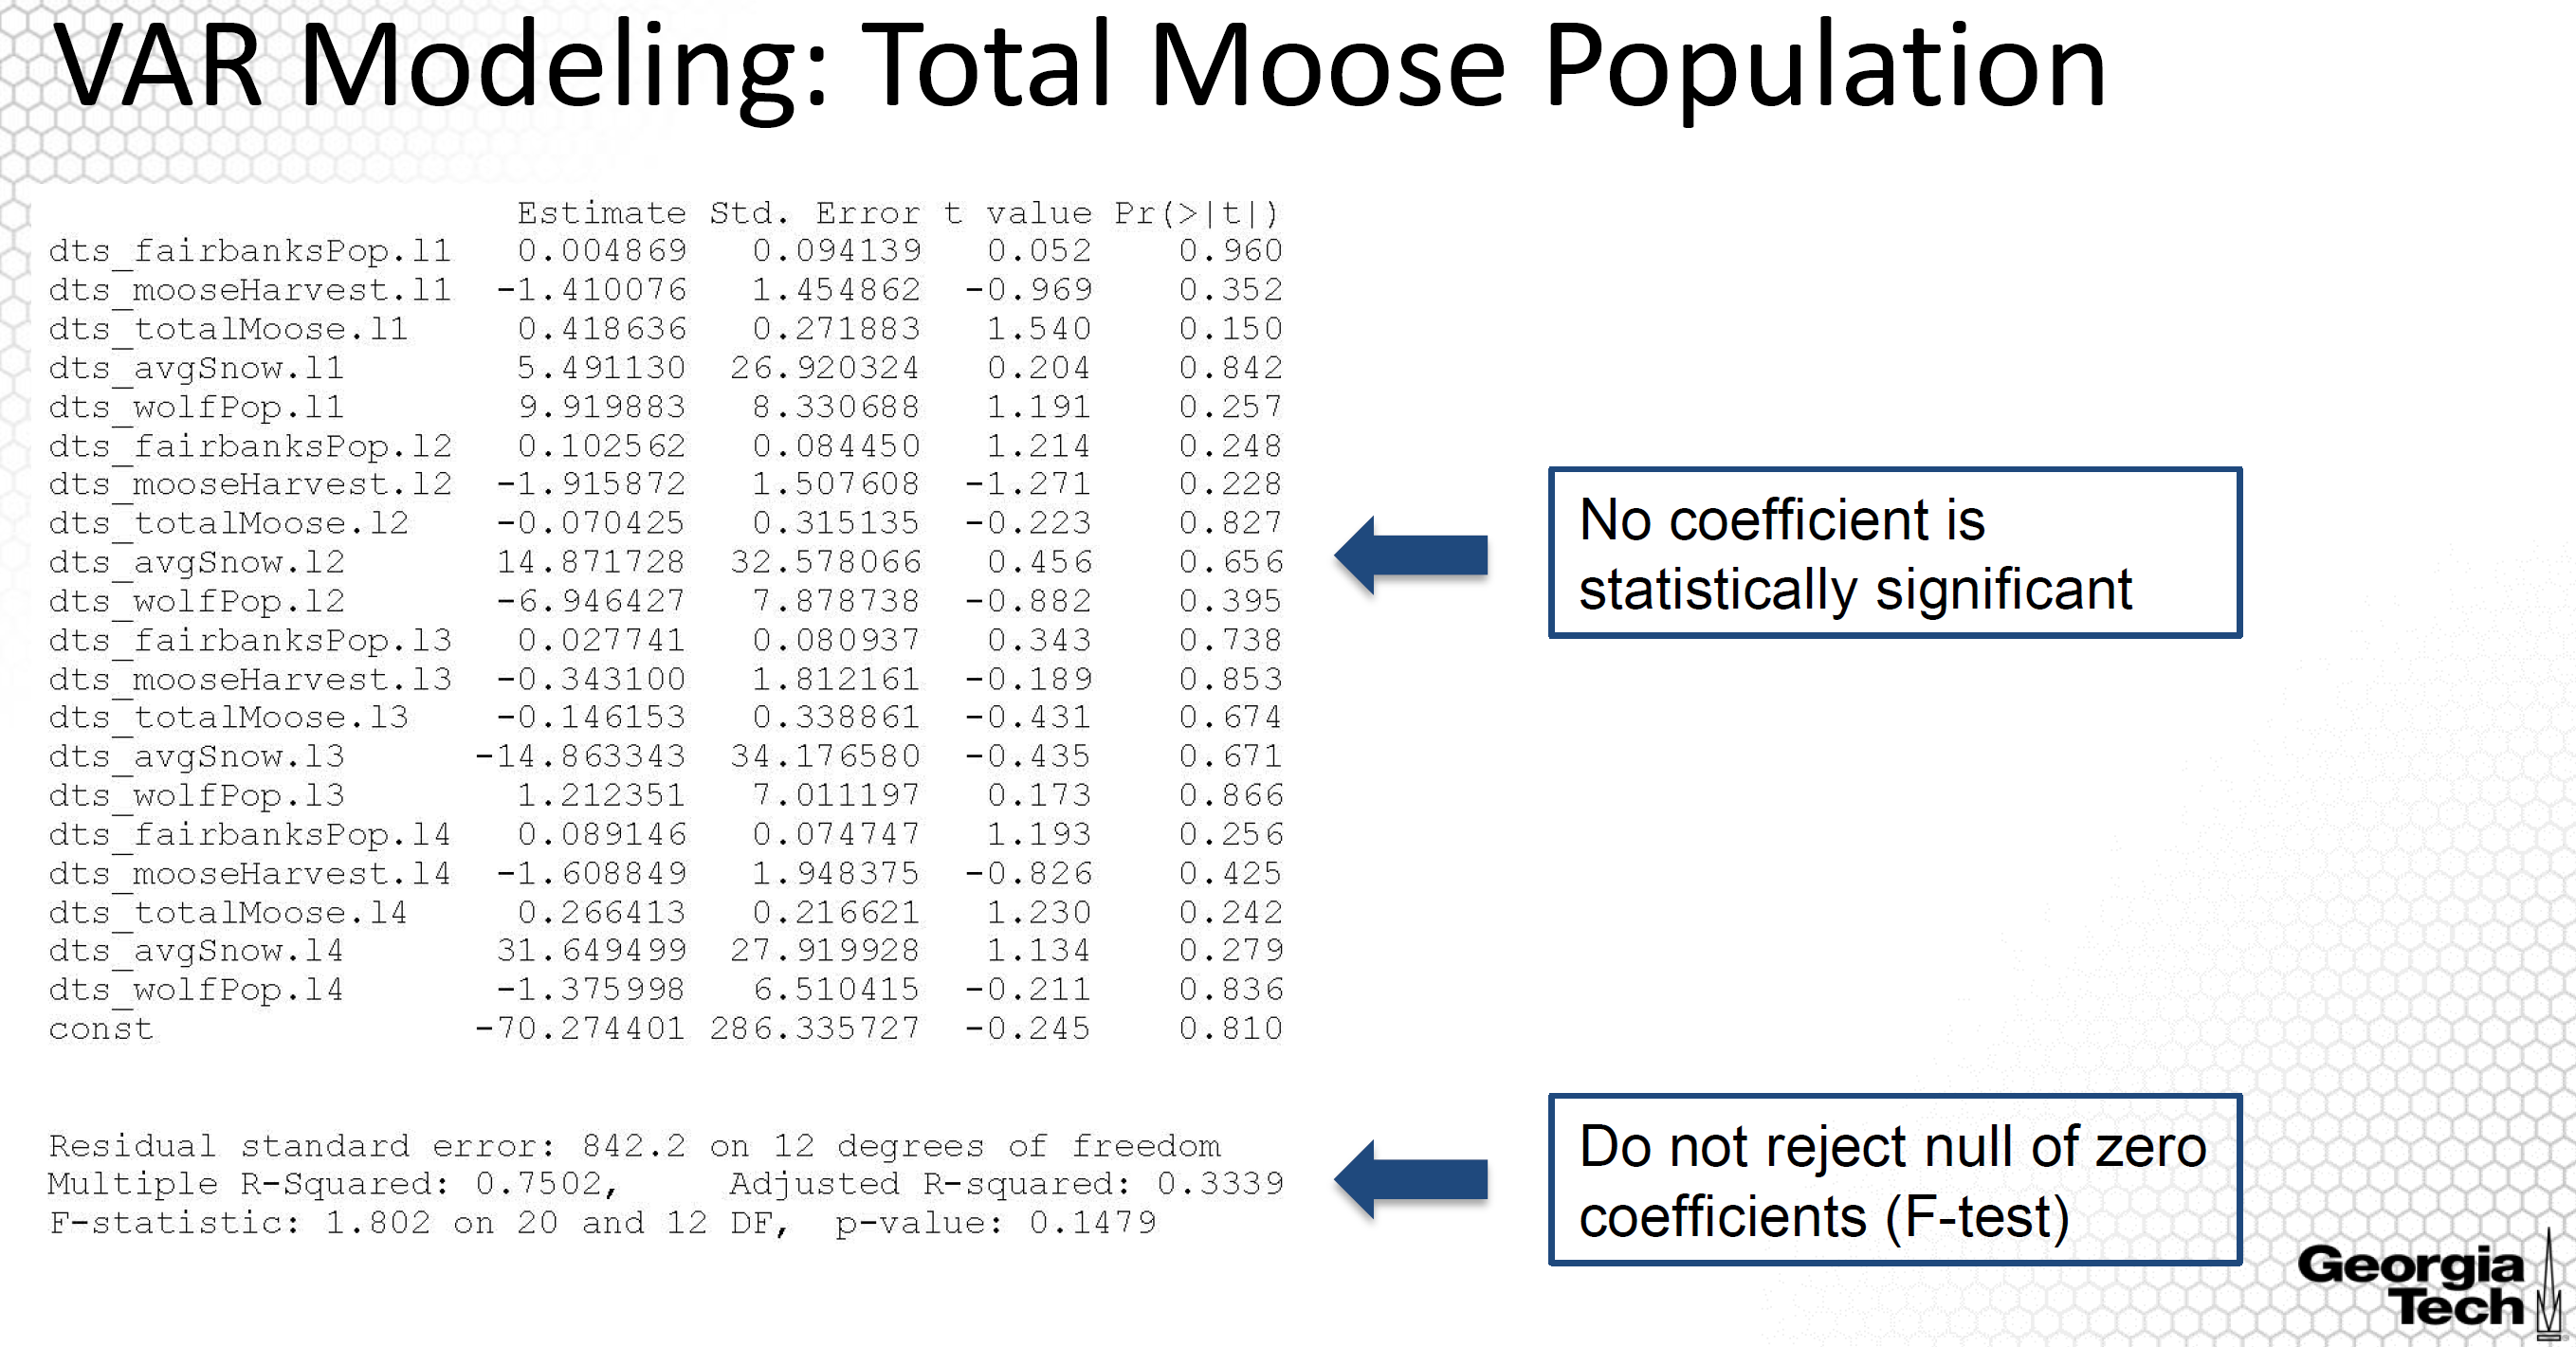


This is the output for the total moose population from the unrestricted VAR model. 
- The output provides the estimation of the coefficients along with statistical inference on the statistical significance of the coefficients. 

The order of the coefficients is as follows. 
- The first five are for the lag one time series relationships of the five time series with respect to the total moose population; 
- the next five are for lag two and so on. 
- The last coefficient is for the constant or the mean of the time series. 

For example, the estimated coefficient for the relationship of lag 1 of the total population in Fairbanks to the total moose population is 0.004; since the p-value is large for this coefficient we conclude that it is not statistically significant given all other factors included in the model. 

The next coefficient is for the relationship with lag 1 time series of the moose harvest and its estimate is -1.41; again since the p-value is large, this coefficient is also not statistically significant. 

In fact, none one the coefficient is statistically significant since the p-values are all large. 

This lack of statistical significance is also reflected in the F-test for the overall regression; for this test, the null hypothesis is that all coefficients are zero; since the p-value is large, we conclude that it is plausible that all coefficients to be zero.  Let’s take a closer look at the restricted VAR.

**Restricted VAR Modeling**

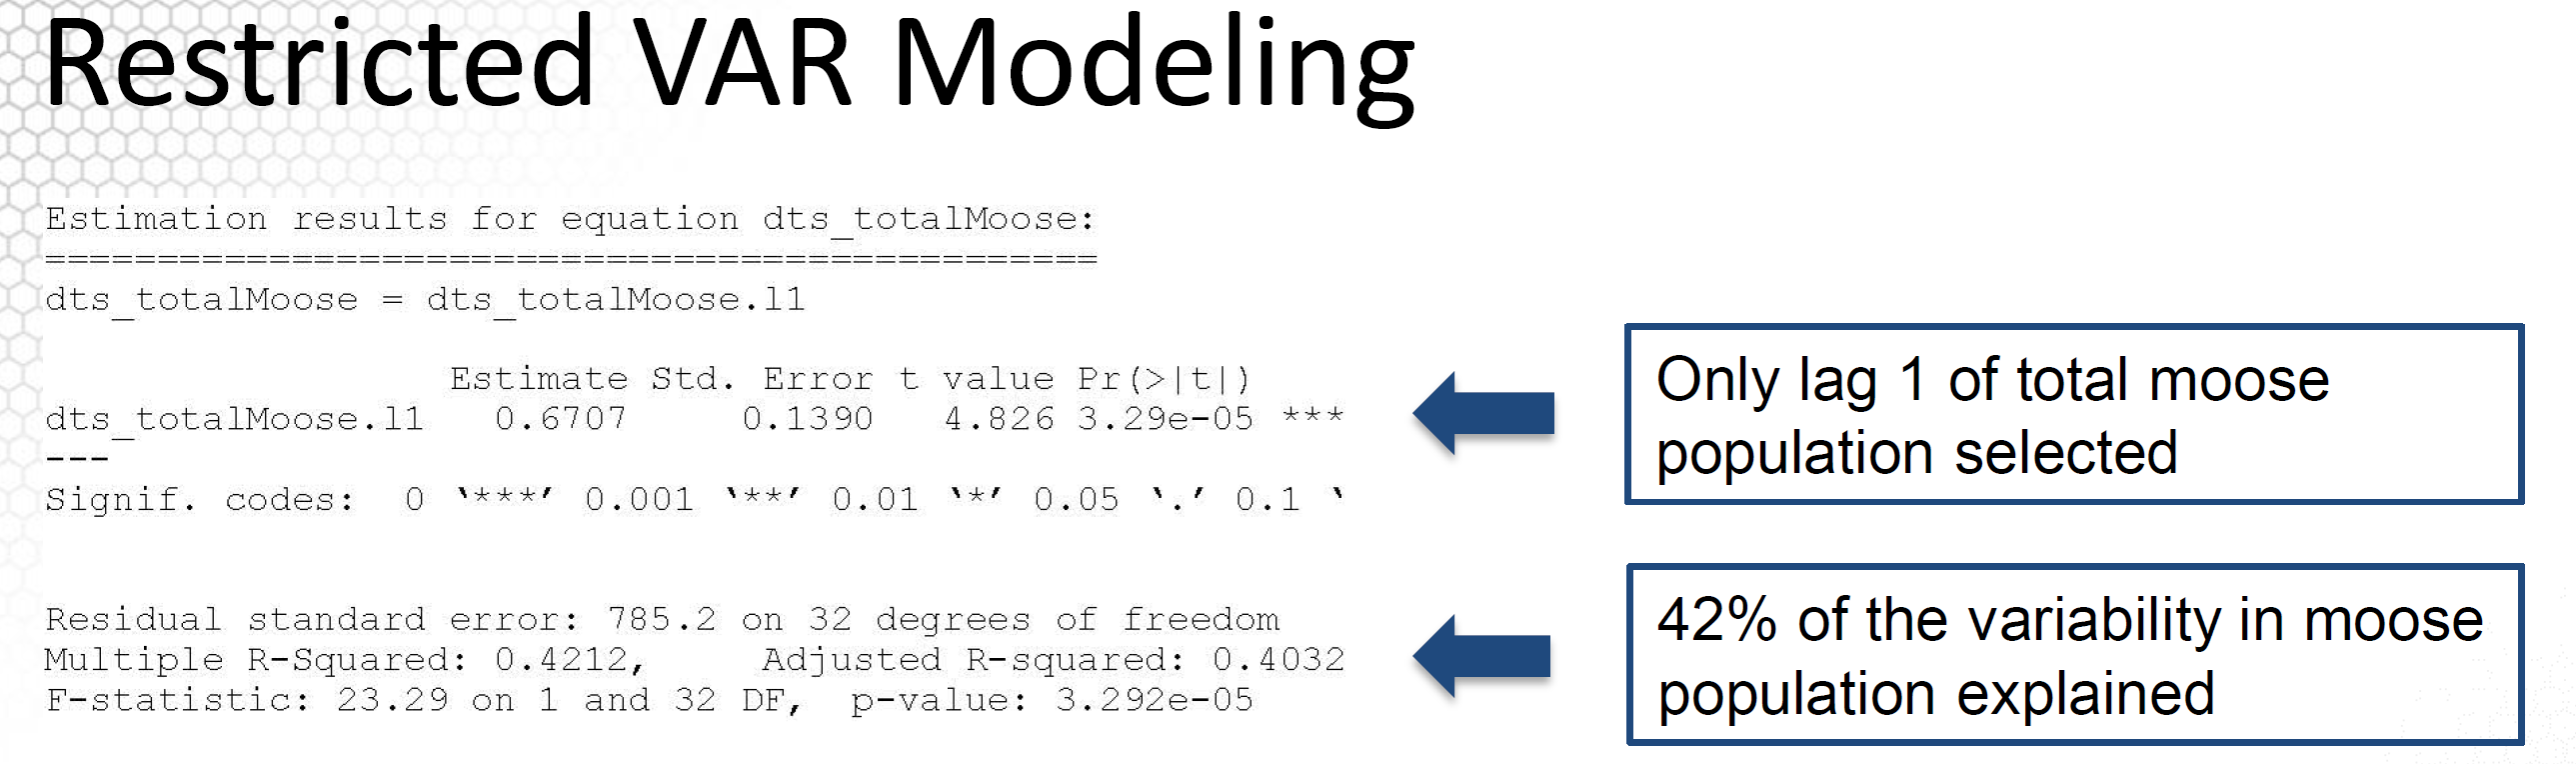


The output for the restricted VAR is on the slide.

- The restricted VAR only includes the lag 1 time series for the total moose population and the coefficient for this relationship is statistically significant. 
- Moreover, by including this relationship alone, we explain 42% of the variability in the total moose population. 
- Since none of the lagged relationships with respect to other time series have been selected, **we may conclude that other time series do not Granger cause the total moose population. We will test this formally in the next slide.**

**Granger Causality: Total Moose Population**

- We apply here the Wald test where the **null hypothesis is that all coefficients corresponding to each of the four lagged times series, including total population in Fairbanks, moose harvest, average snow and total wolf population, are zero, meaning that they do not Granger cause the total moose population.**
- The test is applied separately for each of the four time series separately.

In [1]:
## Granger Causality: Wald Test
library(aod)
coef.moosepop = coefficients(model.var)$dts_totalMoose[-(5*4+1),1]
var.model = vcov(model.var)[44:63,44:63] 
## Granger Causality: Fairbanks Population
wald.test(b=coef.moosepop, var.model, Terms=seq(1, 5*4, 5))
## Granger Causality: Moose Harvest
wald.test(b=coef.moosepop, var.model, Terms=seq(2, 5*4, 5))
## Granger Causality: Average Snow Fall
wald.test(b=coef.moosepop, var.model, Terms=seq(4, 5*4, 5))
## Granger Causality: Wolf Population
wald.test(b=coef.moosepop, var.model, Terms=seq(5, 5*4, 5))

Warning message:
“package ‘aod’ was built under R version 4.0.5”


ERROR: Error in coefficients(model.var): object 'model.var' not found


- From these results we find that **there is no Granger causality for any of the four time series because the p-values are not small to reject the null hypothesis**.
- The results from this Granger causality analysis and the restricted VAR model are hence consistent. 
- I will note however that they may not be consistent; one reason for this is that the model selection approach implemented in R decides on which variable to include in the model based on the p-values of the statistical significance rather than performing a more rigorous model selection approach. Thus, the hypothesis testing procedure provided will be more reliable in identifying Granger causality.

**VAR Modeling: Forecasting**

- Last we consider the forecasting using the VAR model for the total moose population 4 lags ahead. 
- First, we predict the change in the total moose population based on the model.var, which was fitted previously then we obtain the predictions for the total moose population. 
- For the first lag, we add the last value of the time series in the training data, then for the rest of the predictions we add the last predicted value.

In [21]:
## Model Forecasting

pred.model=predict(model.var,n.ahead=4)

dmoosepop.fcst = pred.model[[1]]$dts_totalMoose[,1]
final.pred.3 = rep(0,4)
final.pred.3[1] = ts_totalMoose[(n-4)]+dmoosepop.fcst[1]
final.pred.3[2] = final.pred.3[1]+dmoosepop.fcst[2]
final.pred.3[3] = final.pred.3[2]+dmoosepop.fcst[3]
final.pred.3[4] = final.pred.3[3]+dmoosepop.fcst[4]

**Forecasting Comparison**

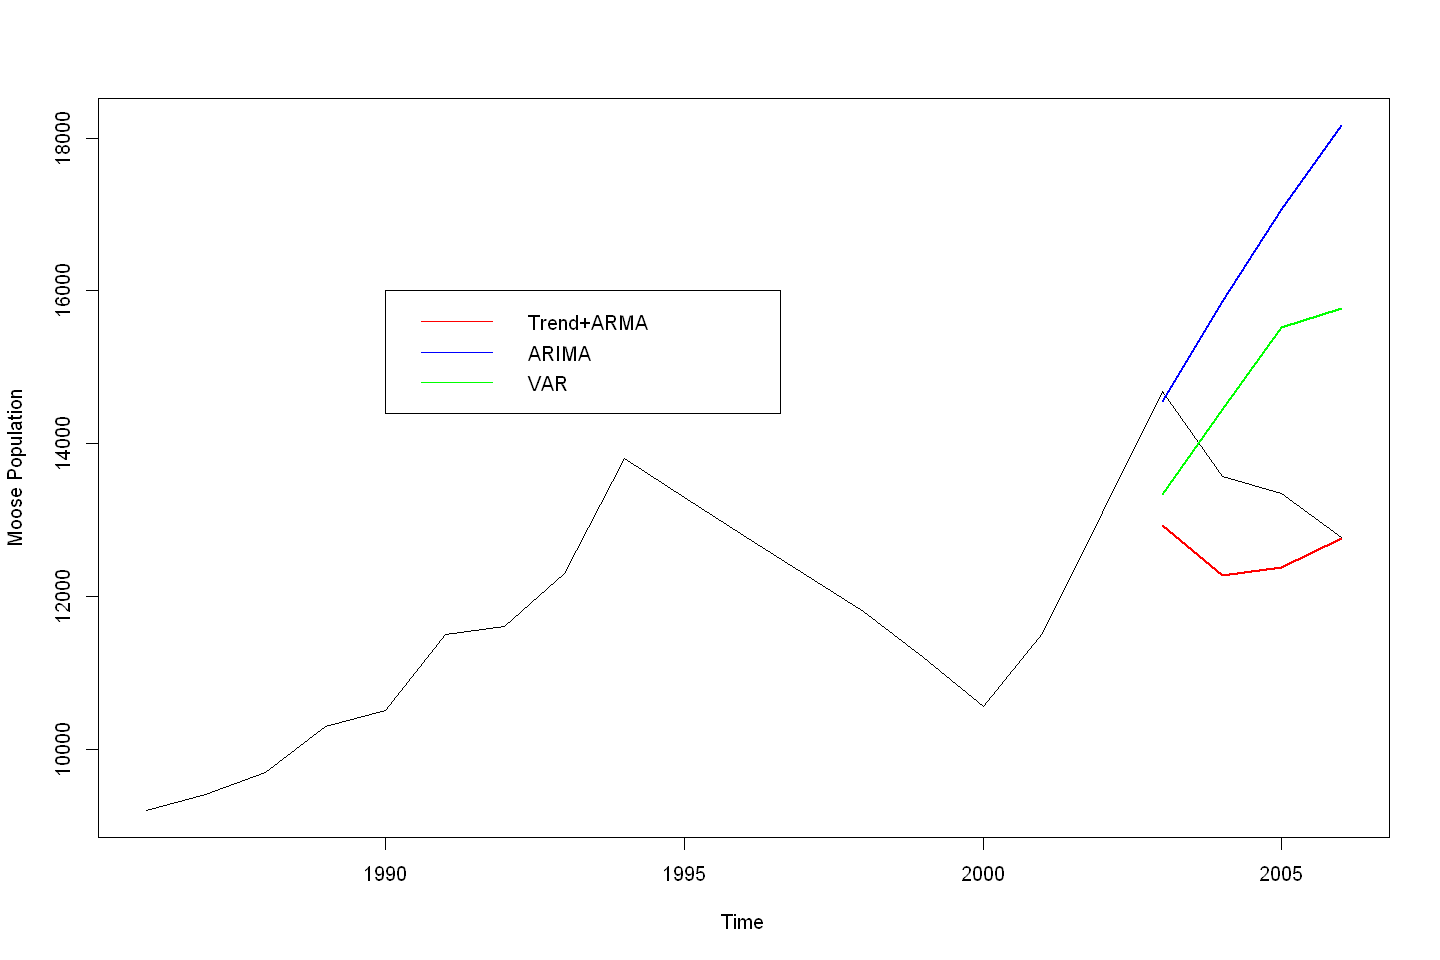

In [22]:
ts_totalMoose=ts(data[,"totalMoose"],start=1965, freq=1)
ymin = min(c(ts_totalMoose[(n-20):n],final.pred.1,final.pred.2,final.pred.3))
ymax = max(c(ts_totalMoose[(n-20):n],final.pred.1,final.pred.2,final.pred.3))
plot(years[(n-20):n], ts_totalMoose[(n-20):n],type="l", ylim=c(ymin,ymax), xlab="Time", ylab="Moose Population")
lines(years[(nfit+1):n],final.pred.1,col="red",lwd=2)
lines(years[(nfit+1):n],final.pred.2,col="blue",lwd=2)
lines(years[(nfit+1):n],final.pred.3,col="green",lwd=2)
legend(1990,16000,legend=c("Trend+ARMA","ARIMA","VAR"),col=c("red","blue","green"),lty=1)

The comparison plot is on the slide. 
- The observed time series for the total moose population for the last 20 years of data is the black line. 
- We also compare the predictions based on the VAR model shown in green with the predictions derived in the previous lesson using the ARIMA model shown in blue and the model in which the trend is fitted using a non-parametric model with the residual process fitted using ARMA; this prediction is shown in red. 

**From this plot, the VAR model performs slightly better than the ARIMA model; although they both mis-capture the trend; this is because the trend shits from an upper trend to a decreasing trend right during the four years we are predicting. The method in which the trend is fitted using non-parametric regression perform significantly better, clearly capturing the decreasing trend although it under-predicts for all 4 years.**

### Alaska Moose Population: Cointegration Analysis

evaluating the co-movement or cointegration of the factors that we believe may influence the Alaskan moose population.

**Evaluating Co-integration**

- Here we are applying the Engle and Granger’s procedure, first estimating the regression coefficients in regressing one factor a time with respect to the Alaskan moose population. 
- Note that here I am simply capturing cointegration with one factor at a time although it is also possible to have cointegration with multiple factors jointly. 

After applying the simple linear regression, I extracted the coefficients then applied the linear transformation to each factor then plot together the moose population time series along with the linearly transformed factors.

In [23]:
##### Co-Integration 
ts_fairbanksPop=ts(data[,"fairbanksPop"],start=1965, freq=1)
ts_mooseHarvest=ts(data[,"mooseHarvest"],start=1965, freq=1)
ts_totalMoose=ts(data[,"totalMoose"],start=1965, freq=1)
ts_avgSnow=ts(data[,"avgSnow"],start=1965, freq=1)
ts_wolfPop=ts(data[,"wolfPop"],start=1965, freq=1)

#####

lm.pop <- lm(ts_totalMoose~ts_fairbanksPop)
coef.pop <-lm.pop$coef
lm.harv <- lm(ts_totalMoose~ts_mooseHarvest)
coef.harv <-lm.harv$coef
lm.snow <- lm(ts_totalMoose~ts_avgSnow)
coef.snow <-lm.snow$coef
lm.wolf <- lm(ts_totalMoose~ts_wolfPop)
coef.wolf <-lm.wolf$coef

In [24]:
coef.pop

(Intercept) ts_fairbanksPop 
    2548.018928        0.110969

**Co-integration of Moose Population**

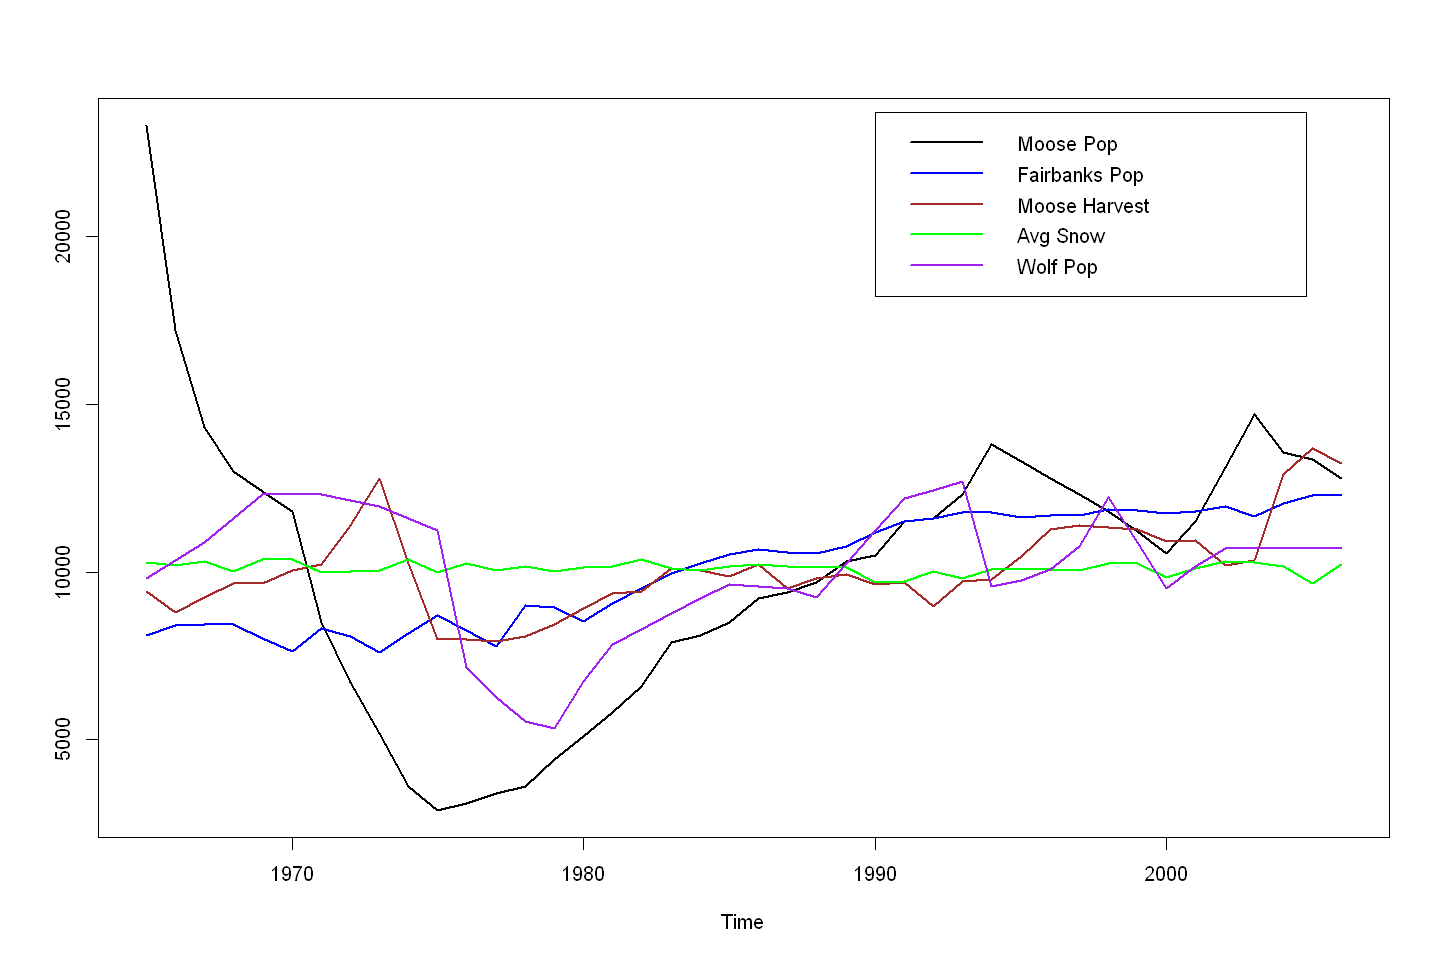

In [25]:
plot(ts_totalMoose, type="l",ylab="",lwd=2)
lines((coef.pop[2]*ts_fairbanksPop+coef.pop[1]),col="blue",lwd=2)
lines((coef.harv[2]*ts_mooseHarvest+coef.harv[1]),col="brown",lwd=2)
lines((coef.snow[2]*ts_avgSnow+coef.snow[1]),col="green",lwd=2)
lines((coef.wolf[2]*ts_wolfPop+coef.wolf[1]),col="purple",lwd=2)
legend(1990,23700,col=c("black","blue","brown","green","purple"),
       legend=c("Moose Pop","Fairbanks Pop","Moose Harvest", "Avg Snow","Wolf Pop"),lty=1,lwd=2)

This is the resulting plot accompanied with the legend on which color corresponds to each factor. 

- From this plot, we see that the moose population has a significant decrease in the early years not identified in other factors. 
- Taking that apart, we see some similarity in the patterns with the Fairbanks population. 
- The average snow has little correlation with the Moose population; in fact, this factor does not change much over time in comparison to other factors.

**Simple Linear Regression Analysis**

In [26]:
summary(lm.pop)


Call:
lm(formula = ts_totalMoose ~ ts_fairbanksPop)

Residuals:
    Min      1Q  Median      3Q     Max 
-5808.7 -2134.4  -370.6  1139.4 15198.8 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     2.548e+03  2.965e+03   0.859   0.3953  
ts_fairbanksPop 1.110e-01  4.257e-02   2.607   0.0128 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3976 on 40 degrees of freedom
Multiple R-squared:  0.1452,	Adjusted R-squared:  0.1239 
F-statistic: 6.796 on 1 and 40 DF,  p-value: 0.01277


In [27]:
summary(lm.harv)


Call:
lm(formula = ts_totalMoose ~ ts_mooseHarvest)

Residuals:
    Min      1Q  Median      3Q     Max 
-7582.8 -2673.5   -73.4  2400.3 13866.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7649.570   1314.156   5.821 8.44e-07 ***
ts_mooseHarvest    5.325      2.497   2.133   0.0391 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4075 on 40 degrees of freedom
Multiple R-squared:  0.1021,	Adjusted R-squared:  0.07965 
F-statistic: 4.548 on 1 and 40 DF,  p-value: 0.03915


In [28]:
summary(lm.snow)


Call:
lm(formula = ts_totalMoose ~ ts_avgSnow)

Residuals:
    Min      1Q  Median      3Q     Max 
-7146.7 -3040.9   891.7  2672.3 13030.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10841.53    2794.07   3.880 0.000381 ***
ts_avgSnow    -22.88      84.95  -0.269 0.789083    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4296 on 40 degrees of freedom
Multiple R-squared:  0.00181,	Adjusted R-squared:  -0.02314 
F-statistic: 0.07252 on 1 and 40 DF,  p-value: 0.7891


In [29]:
summary(lm.wolf)


Call:
lm(formula = ts_totalMoose ~ ts_wolfPop)

Residuals:
    Min      1Q  Median      3Q     Max 
-8332.5 -1503.6  -376.1  1936.7 13486.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2716.57    2439.67   1.113   0.2721   
ts_wolfPop     35.48      11.35   3.125   0.0033 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3855 on 40 degrees of freedom
Multiple R-squared:  0.1962,	Adjusted R-squared:  0.1761 
F-statistic: 9.766 on 1 and 40 DF,  p-value: 0.003304


In [30]:
resid.lm.pop <-residuals(lm.pop)
resid.lm.harv <-residuals(lm.harv)
resid.lm.snow <-residuals(lm.snow)
resid.lm.wolf <-residuals(lm.wolf)

adf.test(resid.lm.pop)
adf.test(resid.lm.harv)
adf.test(resid.lm.snow)
adf.test(resid.lm.wolf)


	Augmented Dickey-Fuller Test

data:  resid.lm.pop
Dickey-Fuller = -2.8299, Lag order = 3, p-value = 0.2465
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  resid.lm.harv
Dickey-Fuller = -3.2172, Lag order = 3, p-value = 0.09766
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  resid.lm.snow
Dickey-Fuller = -3.187, Lag order = 3, p-value = 0.1058
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  resid.lm.wolf
Dickey-Fuller = -3.5682, Lag order = 3, p-value = 0.04747
alternative hypothesis: stationary


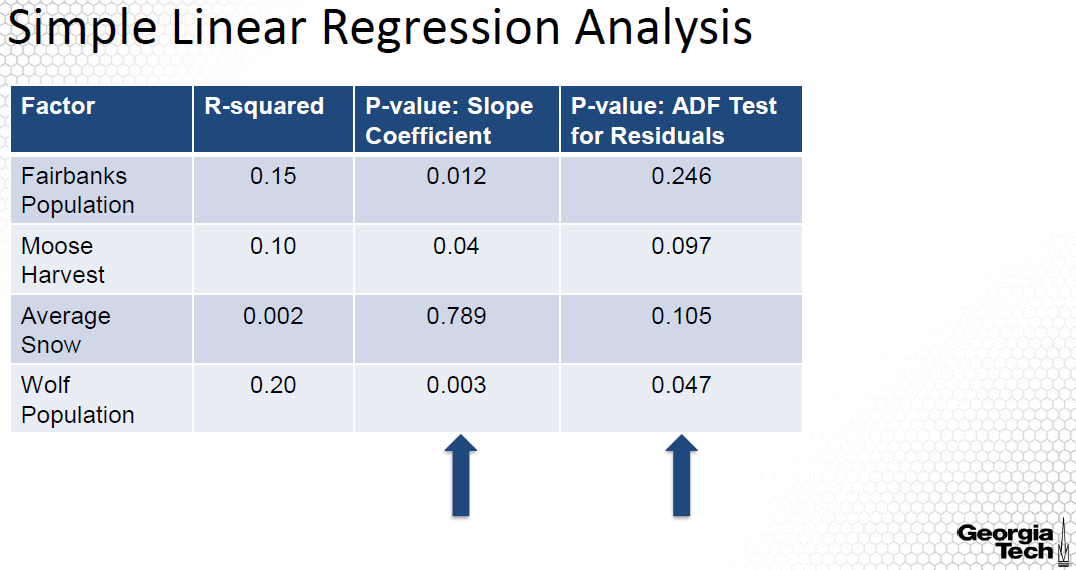


These are the results based on the simple linear regression models from regressing each of the four factors onto the Moose population. Across all factors, the R squared is small, the largest being for the wolf population and the smallest being for the average snow. 

The second column in the table consists of the p-values for statistical significance of the slope coefficients, indicating whether there may be plausibly zero. From these results, we find that three of the factors, excluding Average Snow, may be linear correlated with the Moose population. 

The last column shows the p-value of the **ADF test for stationarity** applied on the residuals of the four models. Based on these results, the **p-value for the ADF test of the residuals of the regression models are all larger than the 0.01 significance levels hence not rejecting the null hypothesis at this level**.  The p-value for the Wolf population factor is however smaller than the significance level 0.05 hence we conclude that we would reject the null hypothesis of non-stationarity for the residuals of the regression where this factor is the regressor at the 0.05 significance level.

**Testing for Cointegration**

**Apply Engle Granger Augmented Dickey Fuller for Cointegration**

- Next, I am evaluating cointegration using hypothesis testing. 
- Specifically, I applied the testing procedure where the **null hypothesis is that the linear transformation of the time series is non-stationary that is we have no cointegration**, with various options in correcting for the co-movement, including none, drift or trend.

In [31]:
## Evaluate potential cointegration 
co.resid.pop <- ts_totalMoose-(coef.pop[2]*ts_fairbanksPop+coef.pop[1])
summary(ur.df(co.resid.pop, type="none",selectlags="BIC"))
summary(ur.df(co.resid.pop, type="drift",selectlags="BIC"))
summary(ur.df(co.resid.pop, type="trend",selectlags="BIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3467.4  -428.3   -64.3   357.3  1521.8 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
z.lag.1    -0.10963    0.05101  -2.149  0.03803 * 
z.diff.lag  0.33393    0.10414   3.207  0.00272 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 960.4 on 38 degrees of freedom
Multiple R-squared:  0.3683,	Adjusted R-squared:  0.3351 
F-statistic: 11.08 on 2 and 38 DF,  p-value: 0.0001619


Value of test-statistic is: -2.1495 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3282.2  -300.8    68.4   483.1  1722.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -147.11078  160.20823  -0.918  0.36444   
z.lag.1       -0.12022    0.05239  -2.294  0.02754 * 
z.diff.lag     0.30496    0.10902   2.797  0.00813 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 962.4 on 37 degrees of freedom
Multiple R-squared:  0.3626,	Adjusted R-squared:  0.3281 
F-statistic: 10.52 on 2 and 37 DF,  p-value: 0.0002409


Value of test-statistic is: -2.2944 2.7221 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-2747.2  -366.5   104.8   647.6  1517.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -776.31663  383.08049  -2.027   0.0502 .
z.lag.1       -0.14217    0.05233  -2.717   0.0101 *
tt            26.95676   14.99754   1.797   0.0807 .
z.diff.lag     0.18886    0.12402   1.523   0.1365  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 934.7 on 36 degrees of freedom
Multiple R-squared:  0.4151,	Adjusted R-squared:  0.3663 
F-statistic: 8.516 on 3 and 36 DF,  p-value: 0.0002095


Value of test-statistic is: -2.7169 3.0011 4.4063 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.15 -3.50 -3.18
phi2  7.02  5.13  

In [32]:
co.resid.snow <- ts_totalMoose-(coef.snow[2]*ts_avgSnow+coef.snow[1])
summary(ur.df(co.resid.snow, type="none",selectlags="BIC"))
summary(ur.df(co.resid.snow, type="drift",selectlags="BIC"))
summary(ur.df(co.resid.snow, type="trend",selectlags="BIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2522.38  -399.94    69.96   451.94  1113.94 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.04829    0.03439  -1.404    0.168    
z.diff.lag  0.49576    0.08945   5.542 2.42e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 803.6 on 38 degrees of freedom
Multiple R-squared:  0.489,	Adjusted R-squared:  0.4621 
F-statistic: 18.18 on 2 and 38 DF,  p-value: 2.886e-06


Value of test-statistic is: -1.4043 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-2507.75  -385.53    84.16   465.86  1131.04 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.02833  131.66273  -0.114    0.910    
z.lag.1      -0.04884    0.03517  -1.389    0.173    
z.diff.lag    0.49383    0.09219   5.357 4.67e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 814.2 on 37 degrees of freedom
Multiple R-squared:  0.4838,	Adjusted R-squared:  0.4559 
F-statistic: 17.34 on 2 and 37 DF,  p-value: 4.859e-06


Value of test-statistic is: -1.3887 0.967 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-1992.2  -421.4   143.9   465.5  1147.1 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -738.22770  397.88994  -1.855  0.07175 . 
z.lag.1       -0.10044    0.04332  -2.318  0.02623 * 
tt            30.98810   16.15523   1.918  0.06305 . 
z.diff.lag     0.33589    0.12126   2.770  0.00881 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 786.2 on 36 degrees of freedom
Multiple R-squared:  0.5317,	Adjusted R-squared:  0.4927 
F-statistic: 13.62 on 3 and 36 DF,  p-value: 4.276e-06


Value of test-statistic is: -2.3183 1.9177 2.8737 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.15 -3.50 -3.18
phi2  7.02  5

In [33]:
co.resid.harv <- ts_totalMoose-(coef.harv[2]*ts_mooseHarvest+coef.harv[1])
summary(ur.df(co.resid.harv, type="none",selectlags="BIC"))
summary(ur.df(co.resid.harv, type="drift",selectlags="BIC"))
summary(ur.df(co.resid.harv, type="trend",selectlags="BIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3791.2  -395.4   -49.1   488.8  1961.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.12292    0.05239  -2.346 0.024276 *  
z.diff.lag  0.44934    0.10767   4.173 0.000168 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1120 on 38 degrees of freedom
Multiple R-squared:  0.4171,	Adjusted R-squared:  0.3864 
F-statistic:  13.6 on 2 and 38 DF,  p-value: 3.516e-05


Value of test-statistic is: -2.3463 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3638.7  -279.1    61.8   596.1  2089.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -110.64191  184.60460  -0.599 0.552595    
z.lag.1       -0.12740    0.05336  -2.387 0.022186 *  
z.diff.lag     0.43367    0.11170   3.882 0.000412 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1130 on 37 degrees of freedom
Multiple R-squared:  0.4085,	Adjusted R-squared:  0.3765 
F-statistic: 12.78 on 2 and 37 DF,  p-value: 6.044e-05


Value of test-statistic is: -2.3875 2.8858 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3814.6  -276.2    64.7   674.1  1810.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -727.04344  441.85774  -1.645  0.10859   
z.lag.1       -0.15849    0.05622  -2.819  0.00778 **
tt            26.81869   17.53077   1.530  0.13481   
z.diff.lag     0.35082    0.12236   2.867  0.00688 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1110 on 36 degrees of freedom
Multiple R-squared:  0.4446,	Adjusted R-squared:  0.3983 
F-statistic: 9.606 on 3 and 36 DF,  p-value: 8.503e-05


Value of test-statistic is: -2.819 2.7737 4.1234 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.15 -3.50 -3.18
phi2  7.02  5.1

**Cointegration: Moose vs Wolf**

In [34]:
co.resid.wolf <- ts_totalMoose-(coef.wolf[2]*ts_wolfPop+coef.wolf[1])
summary(ur.df(co.resid.wolf, type="none",selectlags="BIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3157.3  -765.0   -97.3   399.5  4400.1 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
z.lag.1    -0.15107    0.06474  -2.333  0.02502 * 
z.diff.lag  0.36290    0.11145   3.256  0.00238 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1304 on 38 degrees of freedom
Multiple R-squared:  0.3134,	Adjusted R-squared:  0.2772 
F-statistic: 8.671 on 2 and 38 DF,  p-value: 0.0007905


Value of test-statistic is: -2.3334 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61


In [35]:
summary(ur.df(co.resid.wolf, type="drift",selectlags="BIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3080.1  -675.6   -13.0   482.8  4485.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -83.23048  212.76538  -0.391  0.69790   
z.lag.1      -0.15456    0.06608  -2.339  0.02485 * 
z.diff.lag    0.35589    0.11413   3.118  0.00351 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1319 on 37 degrees of freedom
Multiple R-squared:  0.312,	Adjusted R-squared:  0.2748 
F-statistic:  8.39 on 2 and 37 DF,  p-value: 0.0009892


Value of test-statistic is: -2.3389 2.7382 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94


In [36]:
summary(ur.df(co.resid.wolf, type="trend",selectlags="BIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-2307.2  -733.3   -47.3   591.0  4190.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.313e+03  5.319e+02  -2.470  0.01840 * 
z.lag.1     -2.482e-01  7.236e-02  -3.430  0.00153 **
tt           5.366e+01  2.151e+01   2.495  0.01733 * 
z.diff.lag   2.077e-01  1.222e-01   1.699  0.09802 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1235 on 36 degrees of freedom
Multiple R-squared:  0.4134,	Adjusted R-squared:  0.3645 
F-statistic: 8.457 on 3 and 36 DF,  p-value: 0.0002201


Value of test-statistic is: -3.4302 4.1576 6.2331 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.15 -3.50 -3.18
phi2  7.02  5.

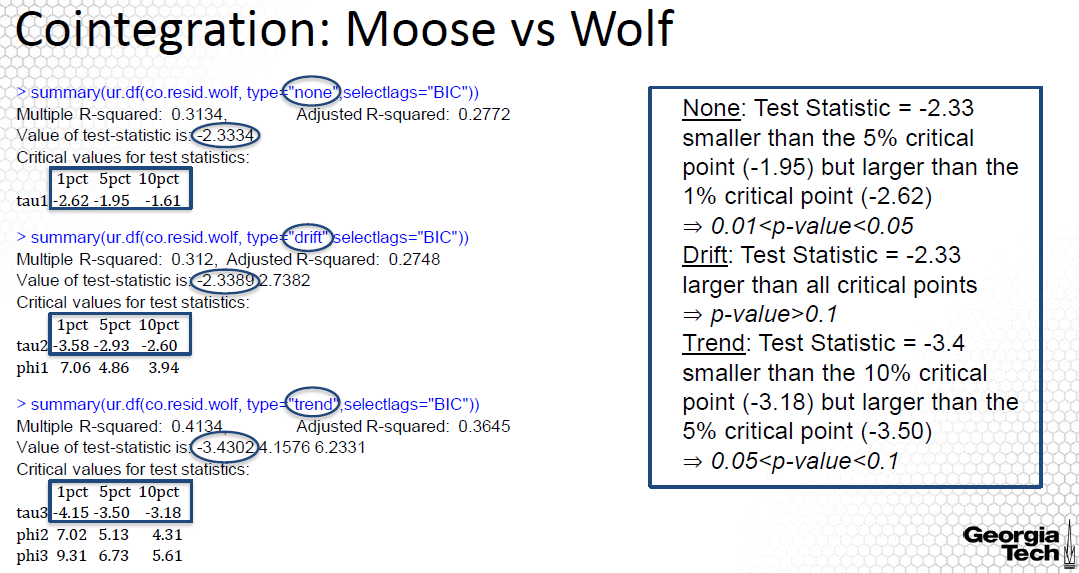


This is the partial output for evaluating co-integration of the Moose population with the wolf population. Here we only focus on the output for the hypothesis testing procedure.

First, we are looking at the results for all three options, none, drift and trend since they generally give different results depending how we would need to correct the co-movement.

For the first test we compare the test statistic with the critical points. **We reject the null hypothesis if the test statistic is smaller than the critical point.**

For the first test with no correction, we have that the test statistic is smaller than the critical point corresponding to the significance level 5% but not for 1%, thus concluding that the p-value is between 0.01 and 0.05, hence small enough to conclude that we would reject the null hypothesis. 

For the second test where we would correct for a drift, the test statistic is larger than all critical points hence the p-value is larger than 0.1 or that we do not reject the null hypothesis. 

For the third test we would correct for a linear trend, the test statistic is smaller than the 10% critical point but larger than the 5% critical point.

**Co-integration Comparison**


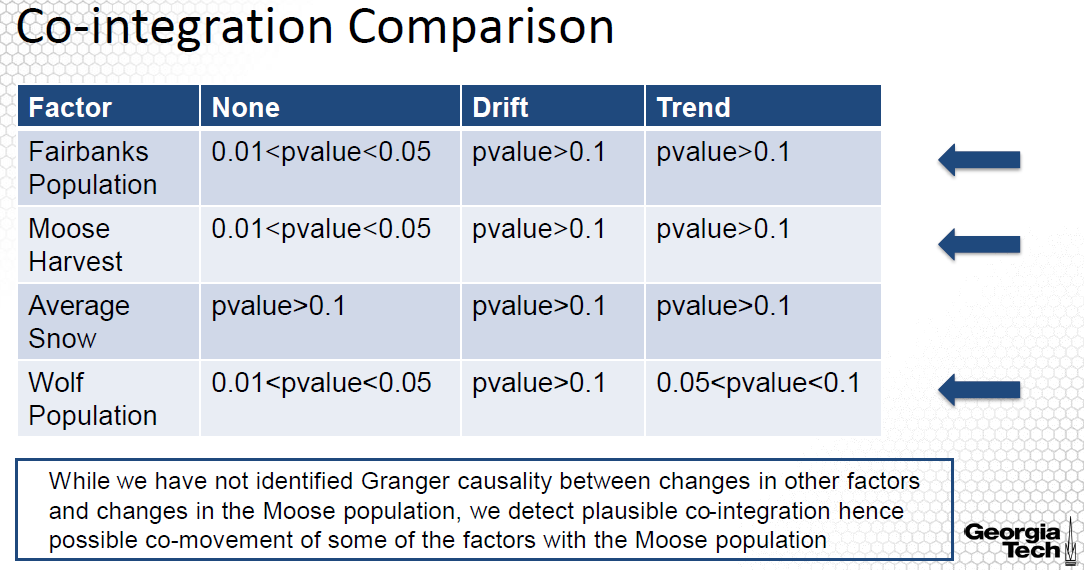

These are results across all factors. The interpretation of the output in the previous slide applies similarly for all factors.

From these results, **we find that three of the factors, the Fairbanks population, the Moose harvest and the wolf population all show plausible cointegration with the Moose population with no correction of the drift or trend required.** 

While we have not identified Granger causality between changes in other factors and changes in the Moose population, we detect plausible co-integration hence plausible co-movement of some factors with the Moose population.

#### End

**Variable Selection Example - Not covered in lectures**

In [37]:
lm.all <- lm(ts_totalMoose~ts_fairbanksPop+ts_mooseHarvest+ts_avgSnow+ts_wolfPop)
summary(lm.all)


Call:
lm(formula = ts_totalMoose ~ ts_fairbanksPop + ts_mooseHarvest + 
    ts_avgSnow + ts_wolfPop)

Residuals:
    Min      1Q  Median      3Q     Max 
-7223.4 -1599.6  -398.7   855.6 14659.0 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -479.39854 3745.84222  -0.128   0.8989  
ts_fairbanksPop    0.10932    0.04692   2.330   0.0254 *
ts_mooseHarvest   -0.25022    2.83263  -0.088   0.9301  
ts_avgSnow      -107.46783   76.63263  -1.402   0.1691  
ts_wolfPop        32.09999   12.15402   2.641   0.0120 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3675 on 37 degrees of freedom
Multiple R-squared:  0.3243,	Adjusted R-squared:  0.2513 
F-statistic:  4.44 on 4 and 37 DF,  p-value: 0.004959


In [38]:
## Stepwise Regression
full = lm.all
minimum = lm(ts_totalMoose~ts_fairbanksPop)
step.model <-step(full, scope = list(lower=minimum, upper = full), direction = "backward")

Start:  AIC=694.26
ts_totalMoose ~ ts_fairbanksPop + ts_mooseHarvest + ts_avgSnow + 
    ts_wolfPop

                  Df Sum of Sq       RSS    AIC
- ts_mooseHarvest  1    105402 499889573 692.27
<none>                         499784171 694.26
- ts_avgSnow       1  26565024 526349195 694.44
- ts_wolfPop       1  94221646 594005817 699.52

Step:  AIC=692.27
ts_totalMoose ~ ts_fairbanksPop + ts_avgSnow + ts_wolfPop

             Df Sum of Sq       RSS    AIC
<none>                    499889573 692.27
- ts_avgSnow  1  26468598 526358171 692.44
- ts_wolfPop  1 111140612 611030184 698.71


In [39]:
summary(step.model)


Call:
lm(formula = ts_totalMoose ~ ts_fairbanksPop + ts_avgSnow + ts_wolfPop)

Residuals:
    Min      1Q  Median      3Q     Max 
-7240.0 -1584.4  -411.9   827.9 14655.6 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)     -384.54575 3541.47828  -0.109  0.91410   
ts_fairbanksPop    0.10747    0.04141   2.595  0.01336 * 
ts_avgSnow      -107.16574   75.55022  -1.418  0.16420   
ts_wolfPop        31.64978   10.88879   2.907  0.00607 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3627 on 38 degrees of freedom
Multiple R-squared:  0.3242,	Adjusted R-squared:  0.2708 
F-statistic: 6.076 on 3 and 38 DF,  p-value: 0.001753


In [40]:
adf.test(step.model$resid)


	Augmented Dickey-Fuller Test

data:  step.model$resid
Dickey-Fuller = -3.8022, Lag order = 3, p-value = 0.02907
alternative hypothesis: stationary


Loading required package: Matrix

Loaded glmnet 4.1-1



5 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  -436.1985727
fairbanksPop    0.1083738
mooseHarvest   -0.1874105
avgSnow      -106.3620478
wolfPop        31.8945501

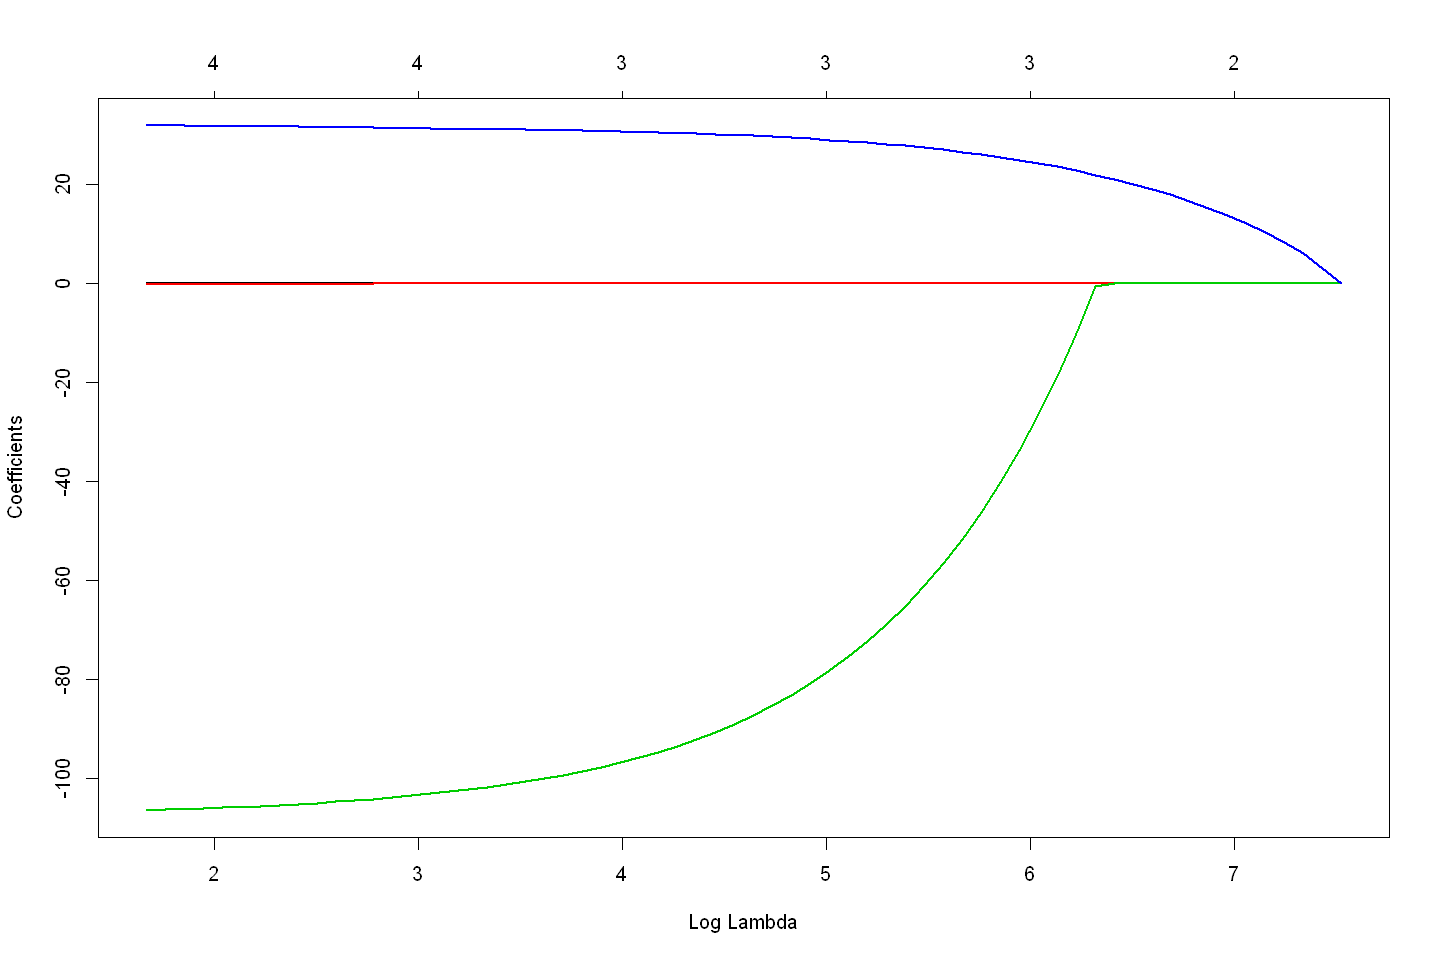

In [41]:
library(glmnet)
## LASSO
## alpha=1 for lasso
Xpred = as.matrix(data[,c(2,3,5,6)])
Y = as.vector(data[,4])
Yscal = (Y-min(Y))/(max(Y)-min(Y))
## Find the optimal lambda using 10-fold CV 
model.cv = cv.glmnet(Xpred, Yscal, alpha=1, nfolds=10)

## Fit lasso model with 100 values for lambda
moose.model = glmnet(Xpred, Y, alpha=1, nlambda=100)

## Extract coefficients at optimal lambda
coef(moose.model, s=model.cv$lambda.min)

## Plot coefficient paths
plot(moose.model, xvar="lambda", lwd=2)
abline(v=log(model.cv$lambda.min), col='black', lty=2, lwd=2)